## Data exploration

This script performs some data exploration to see, what kind of data our data set contains.

In [66]:
import pandas as pd
import numpy as np
import pathlib
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

sys.path.append(os.path.abspath('configs'))
from config import *
path = pathlib.Path.cwd()

In [73]:
data_path = path / "CompiledDataSet" / "Cassini_CDA_Count+Event_V2.csv"

df = pd.read_csv(data_path, index_col=0, parse_dates=["TIME"])
df.head()

C:\Users\jerem\AppData\Local\Temp\ipykernel_7624\3972815107.py:3: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, index_col=0, parse_dates=["TIME"])


,TIME,COUNTER_0,COUNTER_1,COUNTER_2,COUNTER_3,COUNTER_4,COUNTER_5,COUNTER_6,COUNTER_7,COUNTER_8,...,SPACECRAFT_RA,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC,SOURCE_FILE_EVENT
0,2005-01-01 00:00:34,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,CDAEVENTS_05001_05090.TAB
1,2005-01-01 00:01:38,0.0,0.0,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,CDAEVENTS_05001_05090.TAB
2,2005-01-01 00:02:42,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,CDAEVENTS_05001_05090.TAB
3,2005-01-01 00:03:46,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,CDAEVENTS_05001_05090.TAB
4,2005-01-01 00:04:50,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.60,59.23,CDAEVENTS_05001_05090.TAB


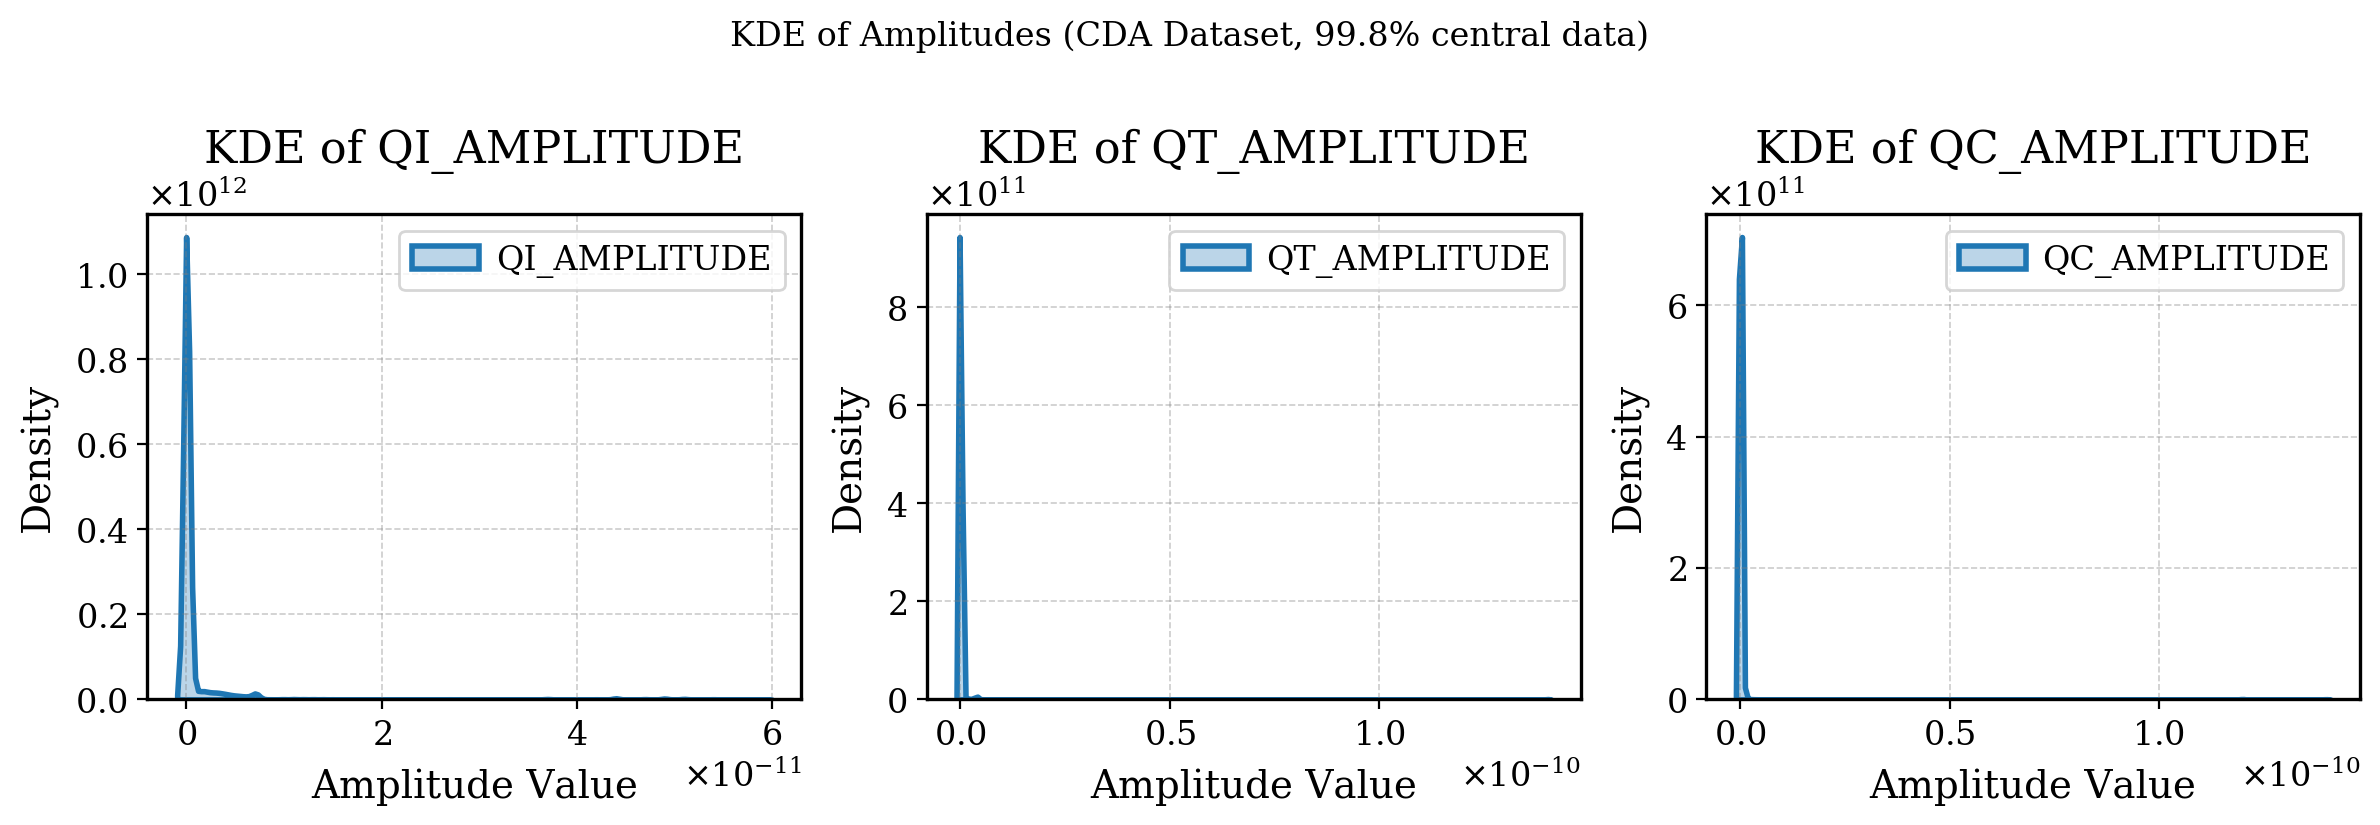

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

amplitude_cols = ["QI_AMPLITUDE", "QT_AMPLITUDE", "QC_AMPLITUDE"]

for i, col in enumerate(amplitude_cols):
    ax = axs[i]
    data = df[col].dropna()
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset, 99.8% central data)", y=1.02)
plt.tight_layout()
plt.show()

Looks as expected

In [75]:
# Add the plume labels

flybys = [
    # name, datetime (UTC), strength
    ("E1",  "2005-03-09 09:08:00", "Weak"),
    ("E2",  "2005-07-14 19:55:14", "Weak"),
    ("E3",  "2008-03-12 19:06:12", "Strong"),
    ("E4",  "2008-08-11 22:21:21", "Strong"),
    ("E5",  "2008-10-09 17:14:51", "Strong"),
    ("E6",  "2008-10-31 17:14:51", "Moderate"),
    ("E7",  "2009-11-02 19:41:57", "Strong"),
    ("E9",  "2010-04-28 19:09:23", "Moderate"),
    ("E10", "2010-05-18 19:10:00", "Weak"),
    ("E12", "2010-11-30 12:06:00", "Strong"),
    ("E13", "2010-12-21 13:11:00", "Strong"),
    ("E14", "2011-10-01 18:40:00", "Moderate"),
    ("E15", "2011-10-19 19:25:00", "Weak"),
    ("E16", "2011-11-06 20:03:00", "Weak"),
    ("E17", "2012-03-27 18:30:00", "Strong"),
    ("E18", "2012-04-14 18:08:00", "Strong"),
    ("E19", "2012-05-02 18:12:00", "Moderate"),
    ("E20", "2015-10-14 05:22:00", "Weak"),
    ("E21", "2015-10-28 15:22:00", "Strong")
]

# --- Create time windows based on plume strength ---
flyby_windows = []
for name, time_str, strength in flybys:
    center = pd.to_datetime(time_str)
    if strength == "Strong":
        delta = timedelta(hours=1.5)
    elif strength == "Moderate":
        delta = timedelta(hours=1.5)
    else:  # Weak
        delta = timedelta(hours=1.5)
    flyby_windows.append((name, center - delta, center + delta, strength))

In [76]:
count_df = df[df.columns[0:17]]
count_df.head()

,TIME,COUNTER_0,COUNTER_1,COUNTER_2,COUNTER_3,COUNTER_4,COUNTER_5,COUNTER_6,COUNTER_7,COUNTER_8,COUNTER_9,COUNTER_14,COUNTER_16,COUNTER_17,COUNTER_19,SOURCE_TYPE,SOURCE_VOLUME
0,2005-01-01 00:00:34,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,COUNTER,COCDA_0007
1,2005-01-01 00:01:38,0.0,0.0,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,COUNTER,COCDA_0007
2,2005-01-01 00:02:42,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,COUNTER,COCDA_0007
3,2005-01-01 00:03:46,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,COUNTER,COCDA_0007
4,2005-01-01 00:04:50,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015625,COUNTER,COCDA_0007


In [78]:
for name, start, end, strength in flyby_windows:
    points_in_window = df[(df['TIME'] >= start) & (df['TIME'] <= end)]
    print(f"{name}: {strength} | {start} to {end} | Points: {len(points_in_window)}")

    if not points_in_window.empty:
        print(f"  Earliest in window: {points_in_window['TIME'].min()}  Latest in window: {points_in_window['TIME'].max()}")
    else:
        # Find closest value before and after the window
        before = df[df['TIME'] < start]
        after = df[df['TIME'] > end]
        if not before.empty:
            nearest_before = before['TIME'].max()
            print(f"  No data in interval! Nearest BEFORE: {nearest_before}")
        else:
            print("  No data in interval! No earlier data found.")
        if not after.empty:
            nearest_after = after['TIME'].min()
            print(f"  Nearest AFTER: {nearest_after}")
        else:
             print("  No later data found.")

E1: Weak | 2005-03-09 07:38:00 to 2005-03-09 10:38:00 | Points: 1392
  Earliest in window: 2005-03-09 07:38:09  Latest in window: 2005-03-09 10:37:59
E2: Weak | 2005-07-14 18:25:14 to 2005-07-14 21:25:14 | Points: 1372
  Earliest in window: 2005-07-14 18:31:08  Latest in window: 2005-07-14 21:25:12
E3: Strong | 2008-03-12 17:36:12 to 2008-03-12 20:36:12 | Points: 0
  No data in interval! Nearest BEFORE: 2008-03-12 16:46:07
  Nearest AFTER: 2008-03-12 20:46:26
E4: Strong | 2008-08-11 20:51:21 to 2008-08-11 23:51:21 | Points: 10
  Earliest in window: 2008-08-11 20:59:12  Latest in window: 2008-08-11 23:51:00
E5: Strong | 2008-10-09 15:44:51 to 2008-10-09 18:44:51 | Points: 2
  Earliest in window: 2008-10-09 16:03:00  Latest in window: 2008-10-09 16:40:27
E6: Moderate | 2008-10-31 15:44:51 to 2008-10-31 18:44:51 | Points: 41
  Earliest in window: 2008-10-31 15:58:12  Latest in window: 2008-10-31 18:44:35
E7: Strong | 2009-11-02 18:11:57 to 2009-11-02 21:11:57 | Points: 0
  No data in inte

[INFO] No data found for E1 (Weak) near 2005-03-09


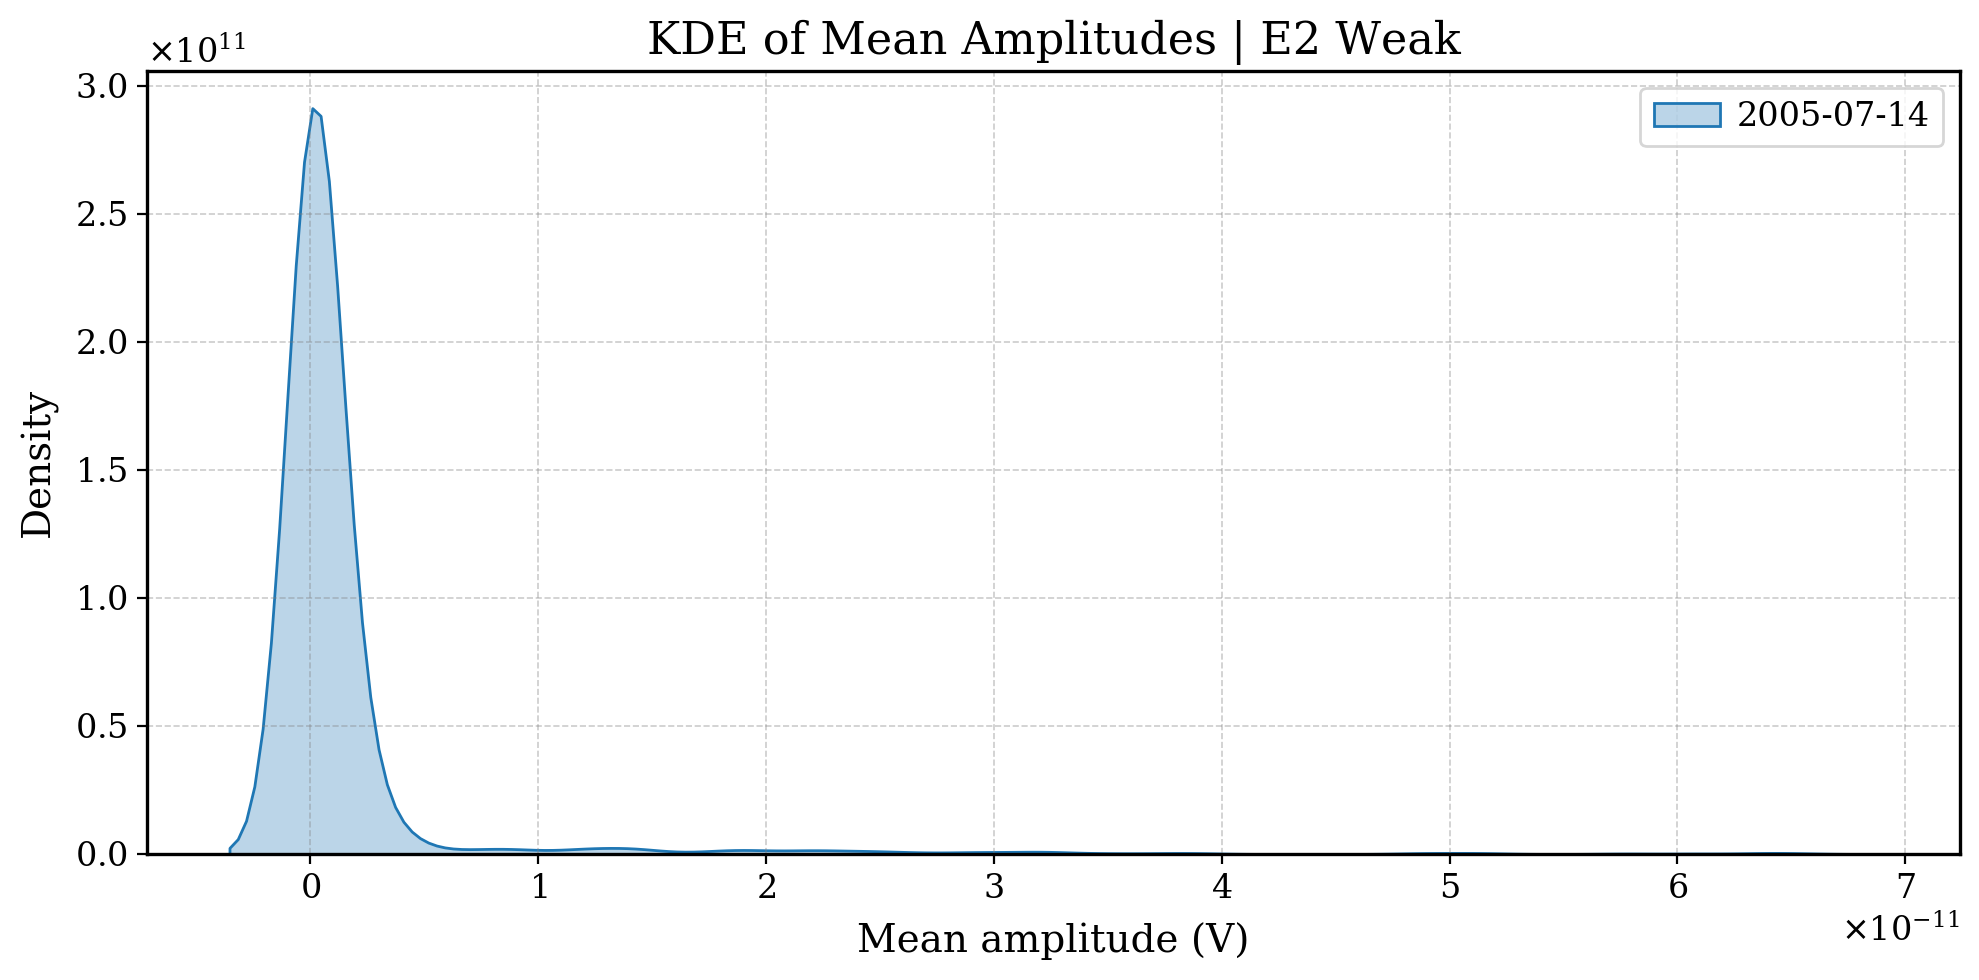

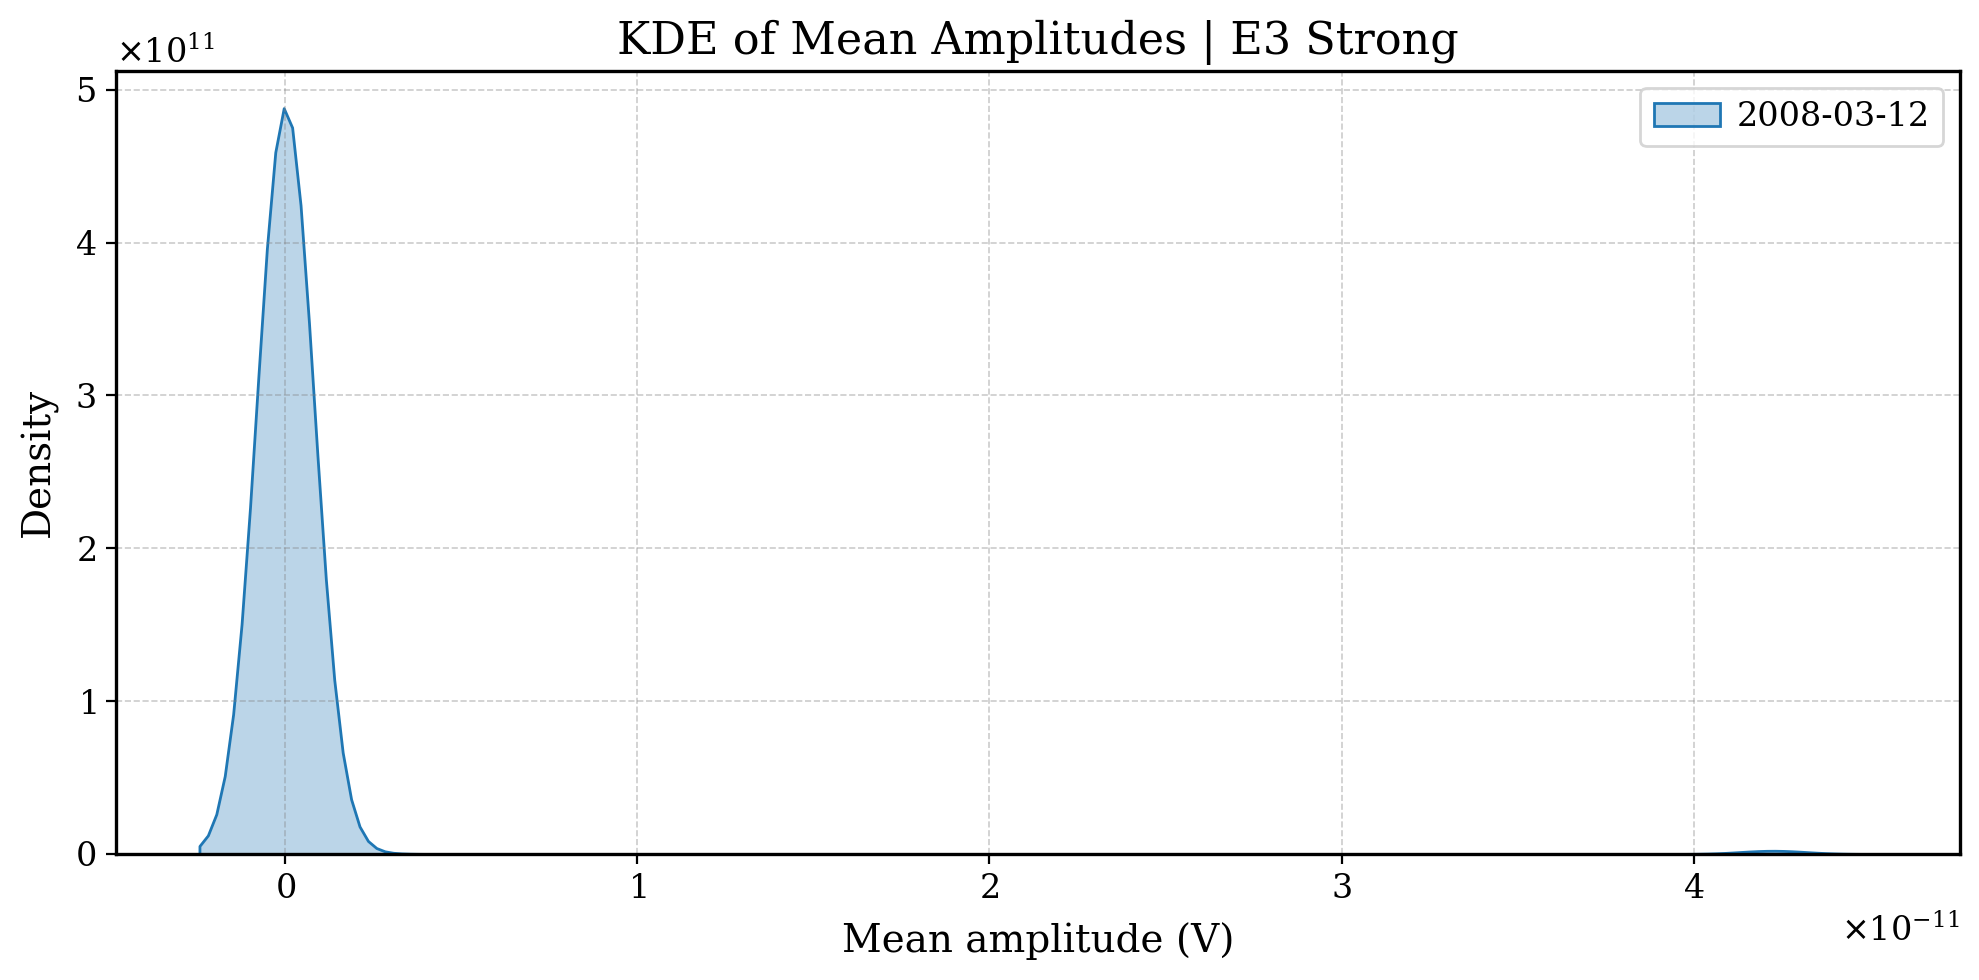

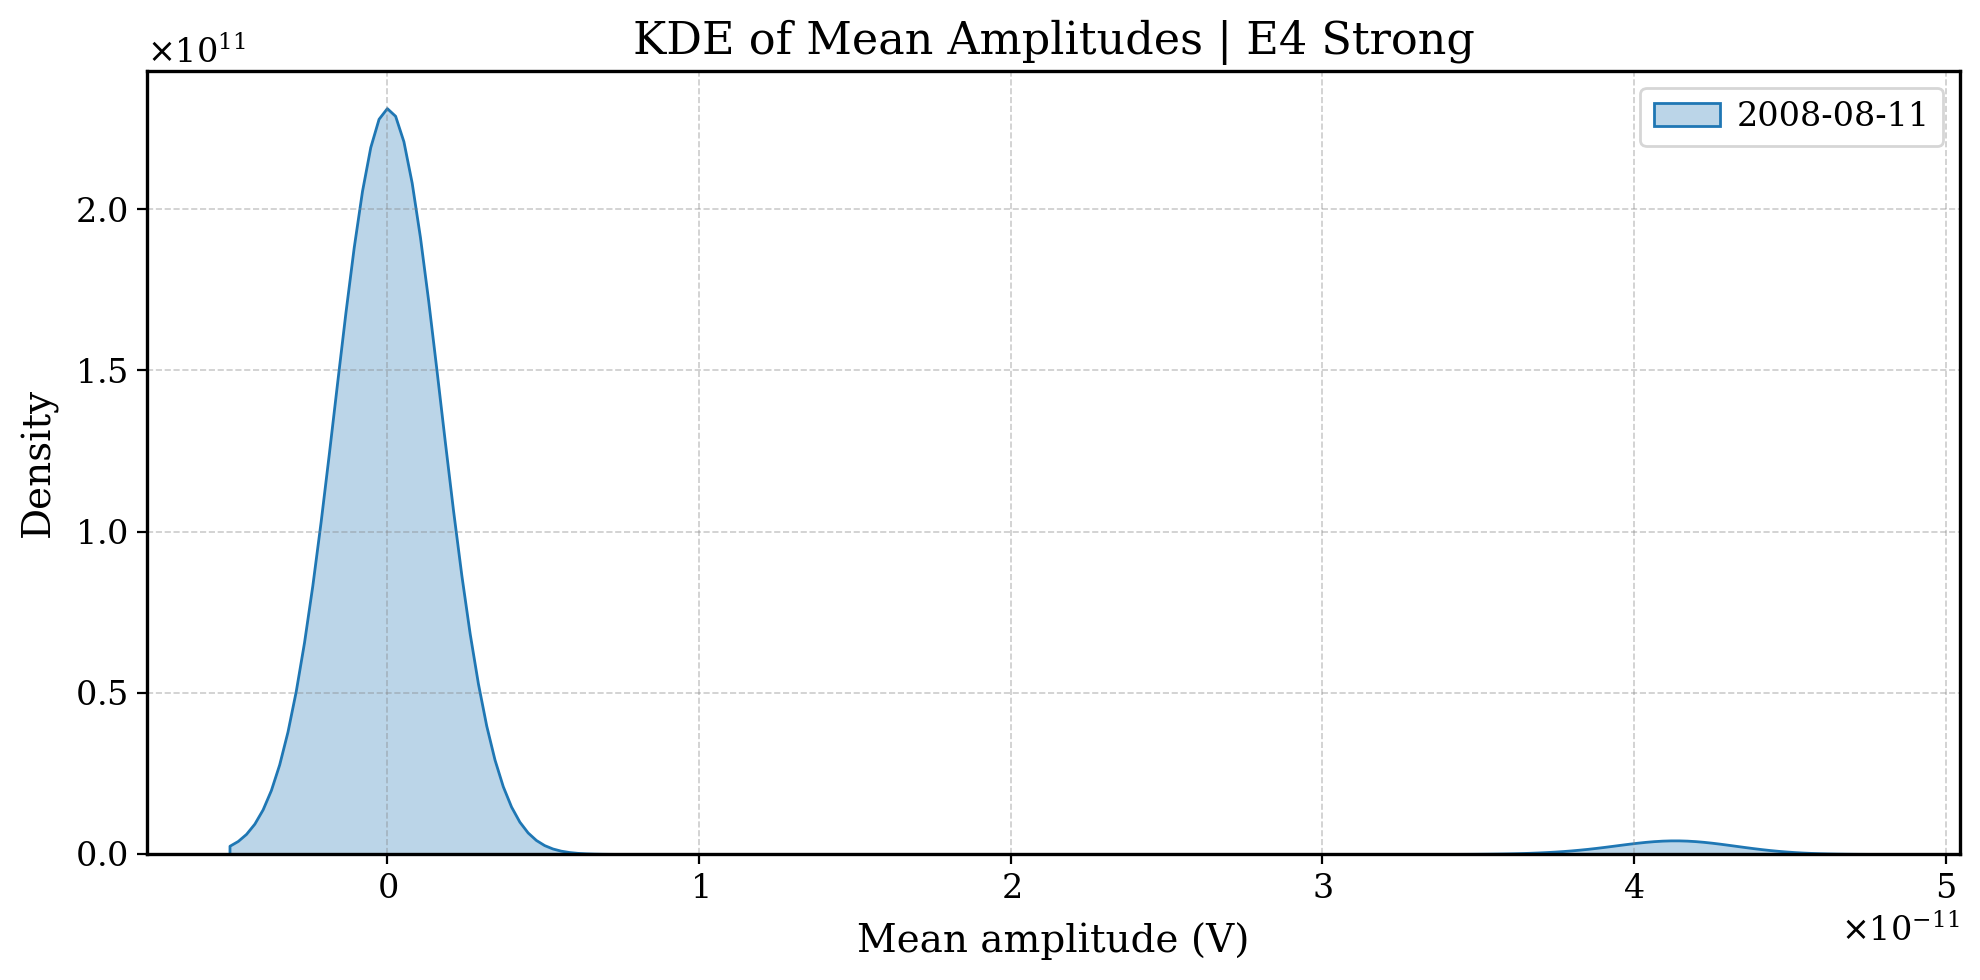

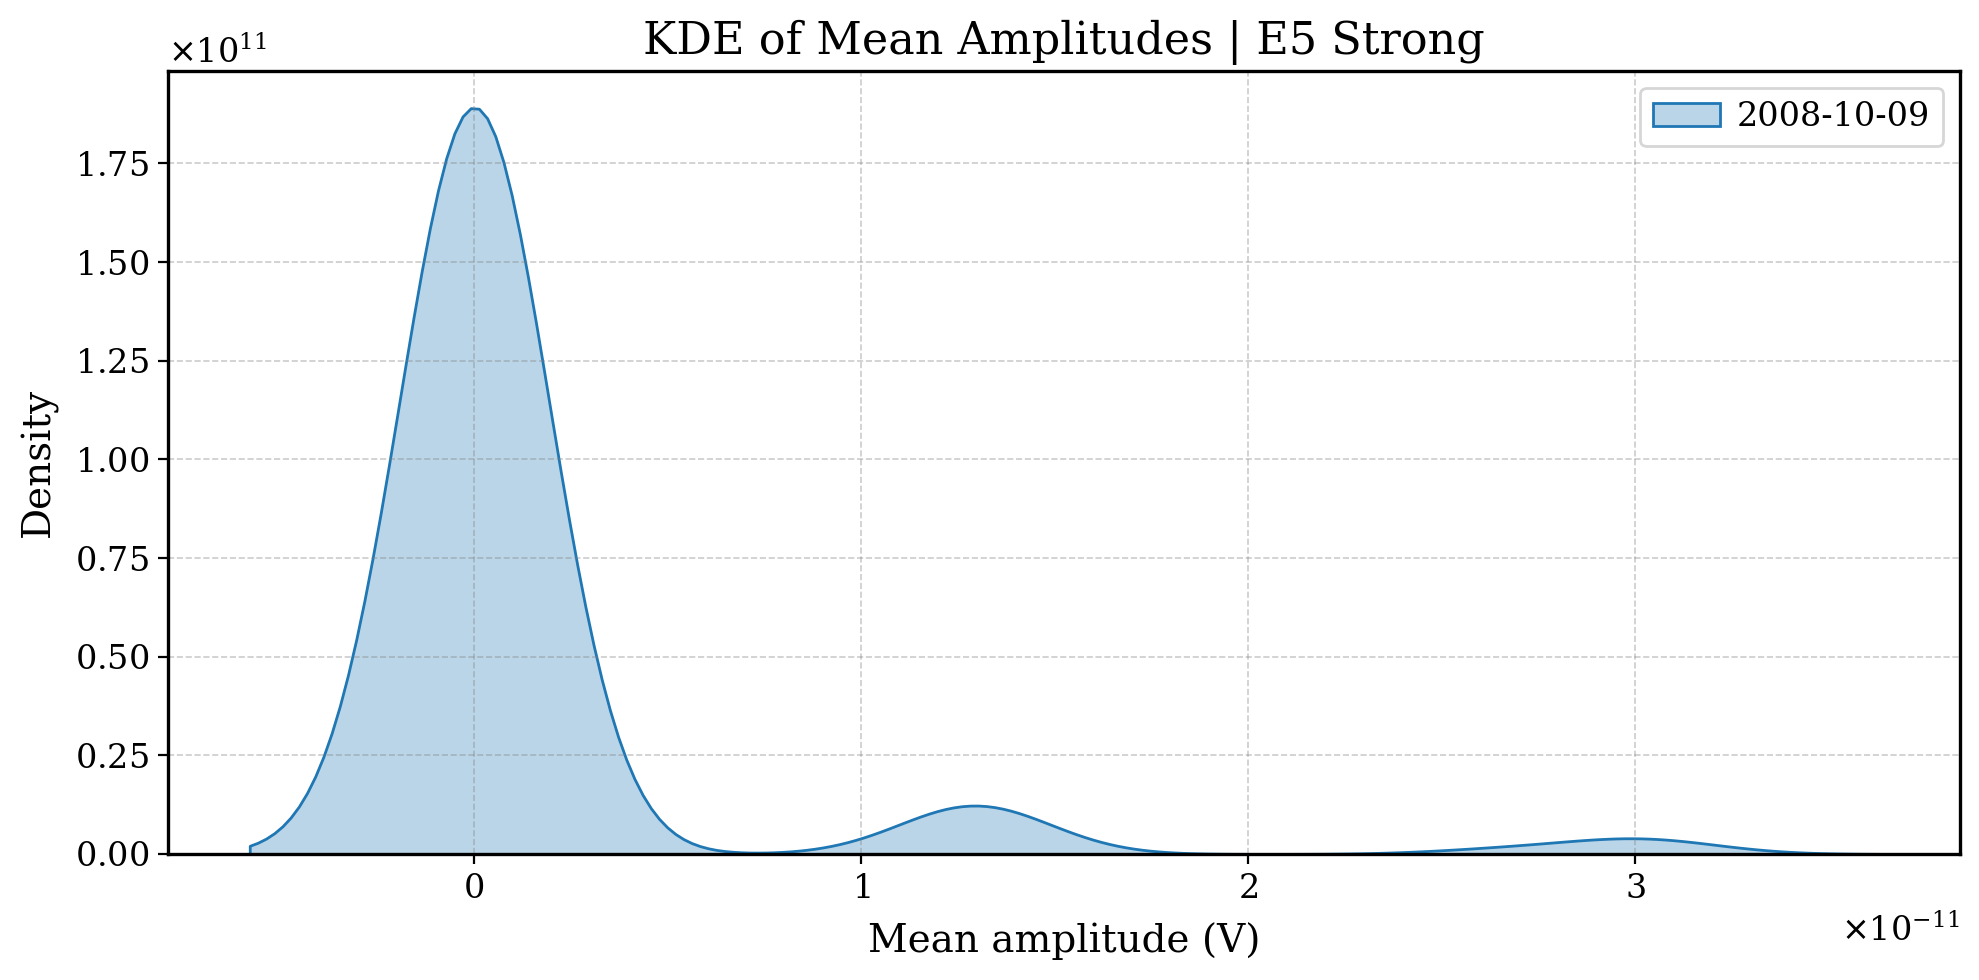

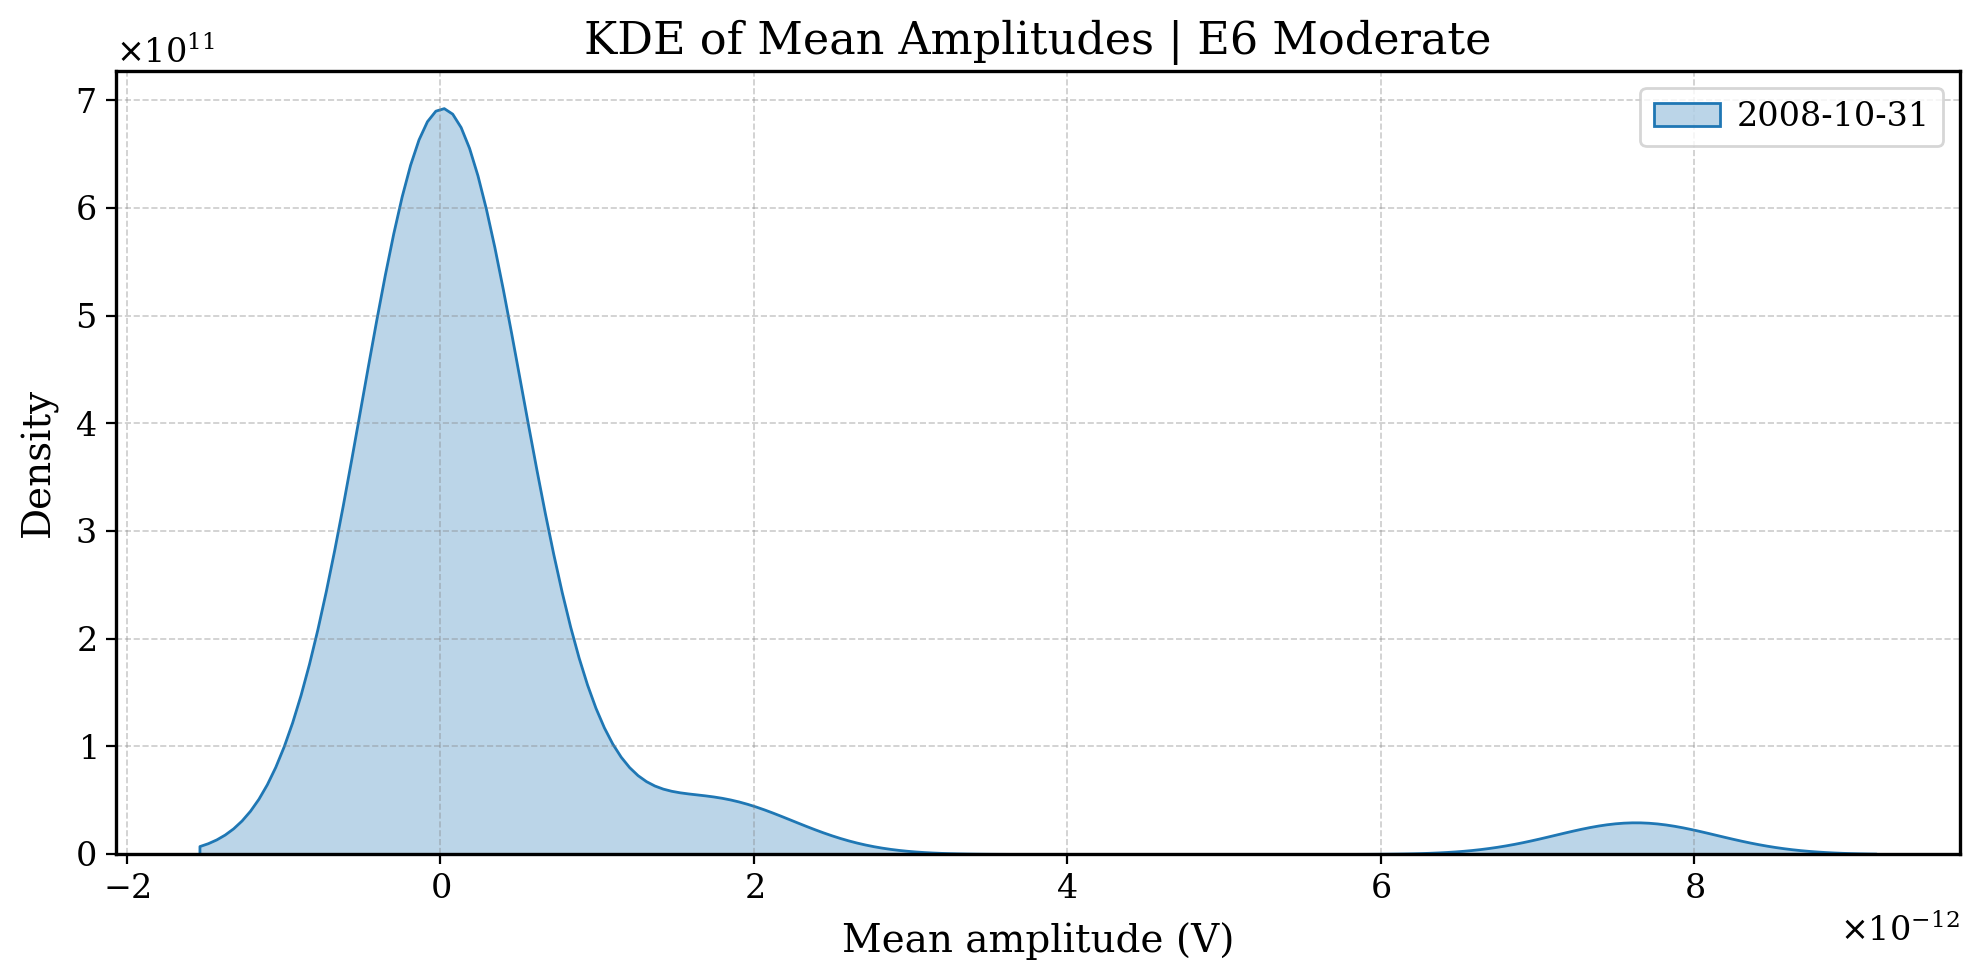

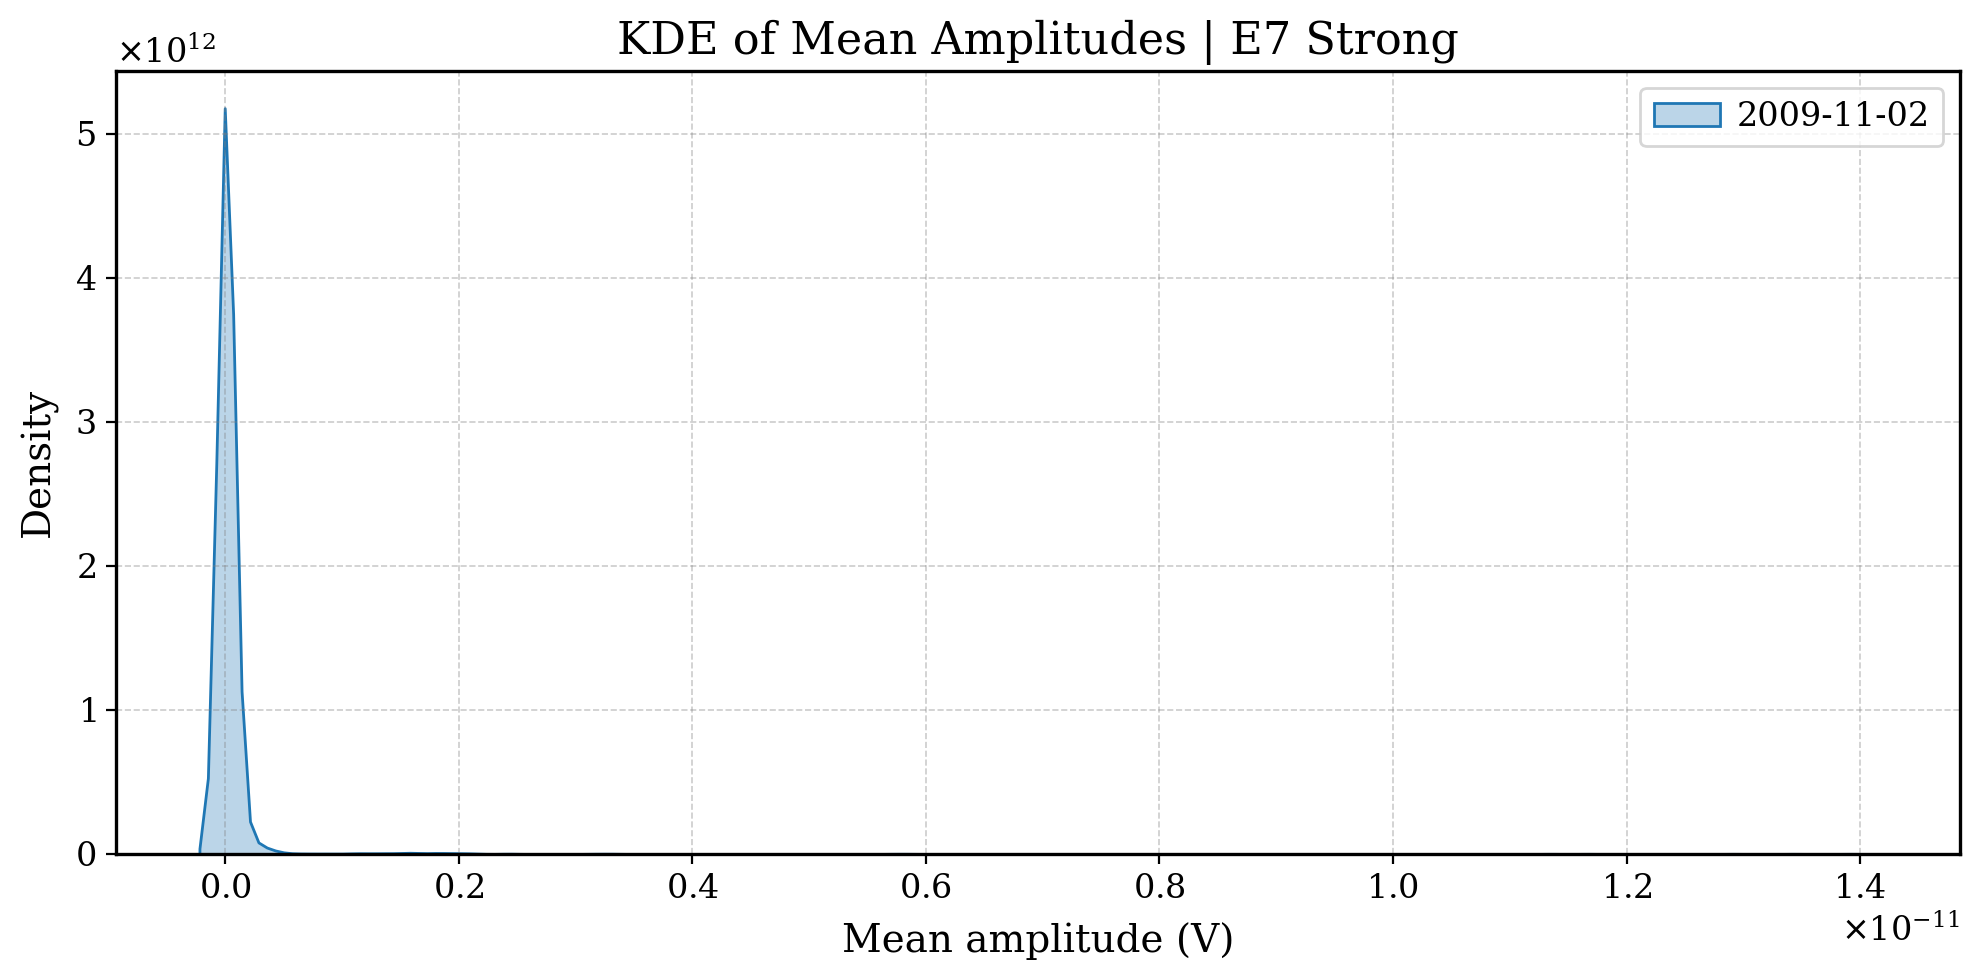

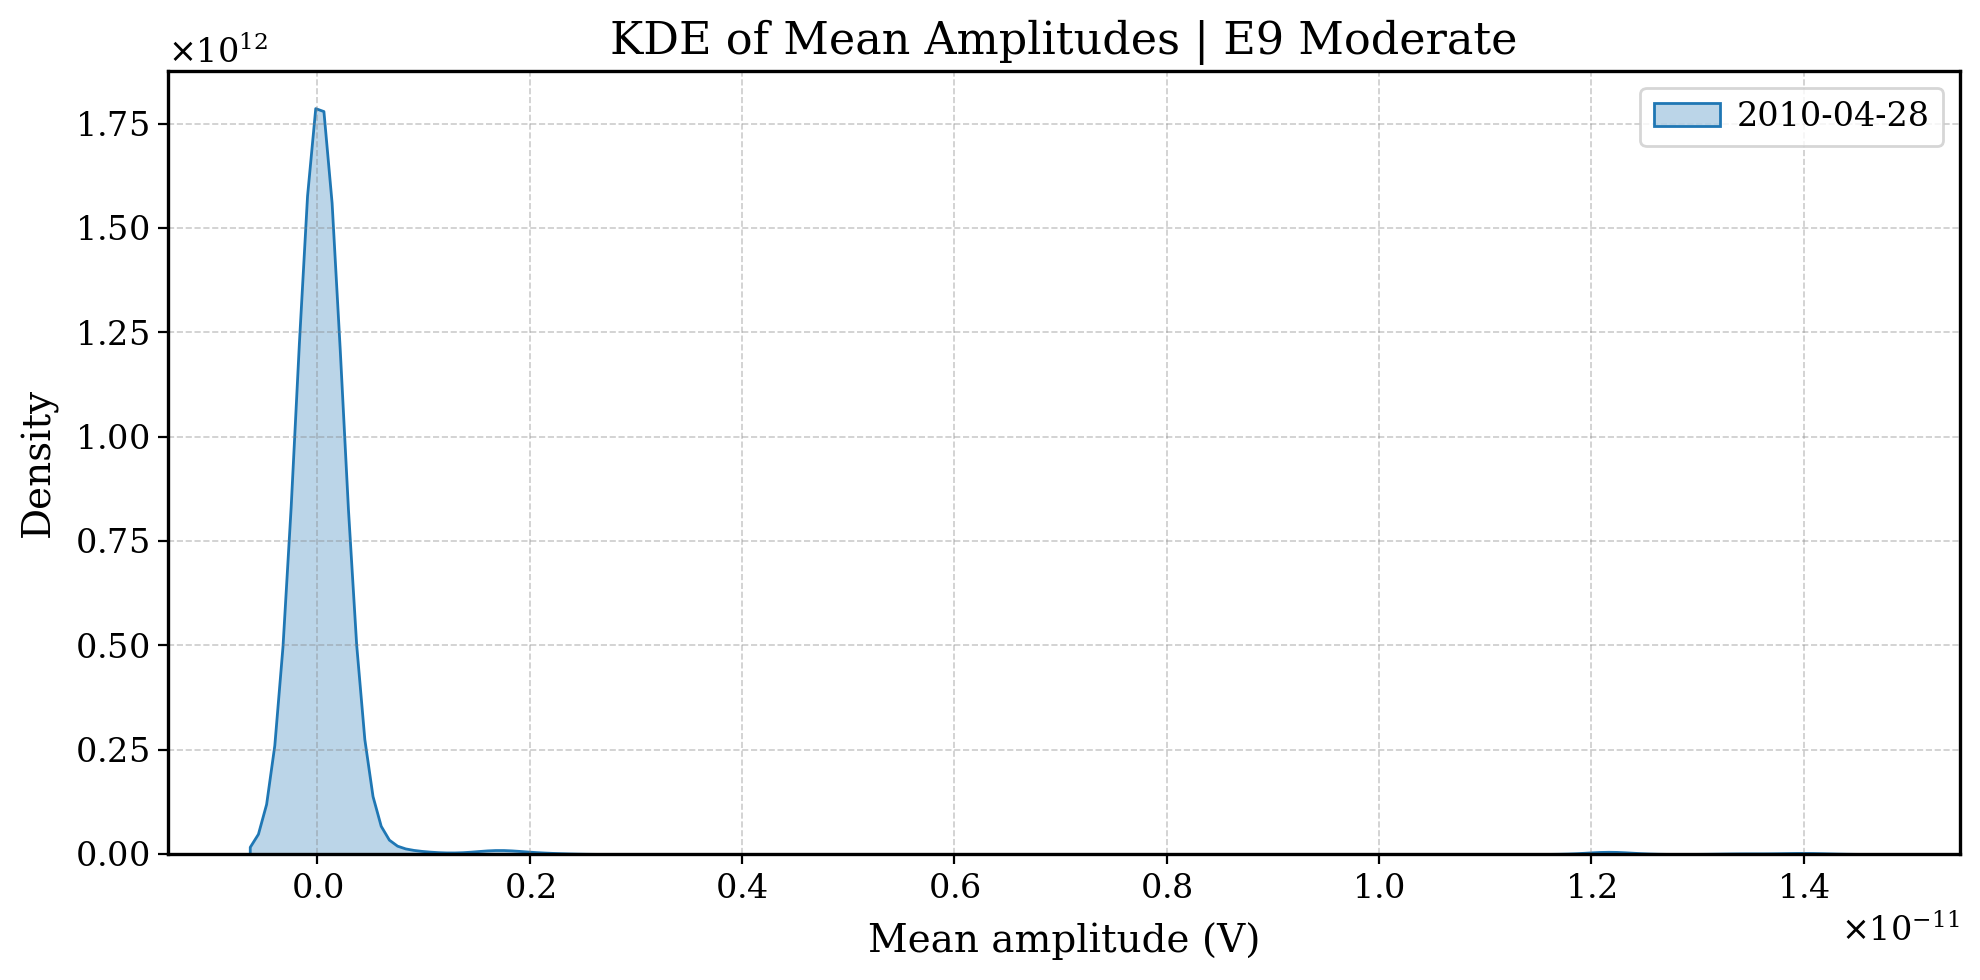

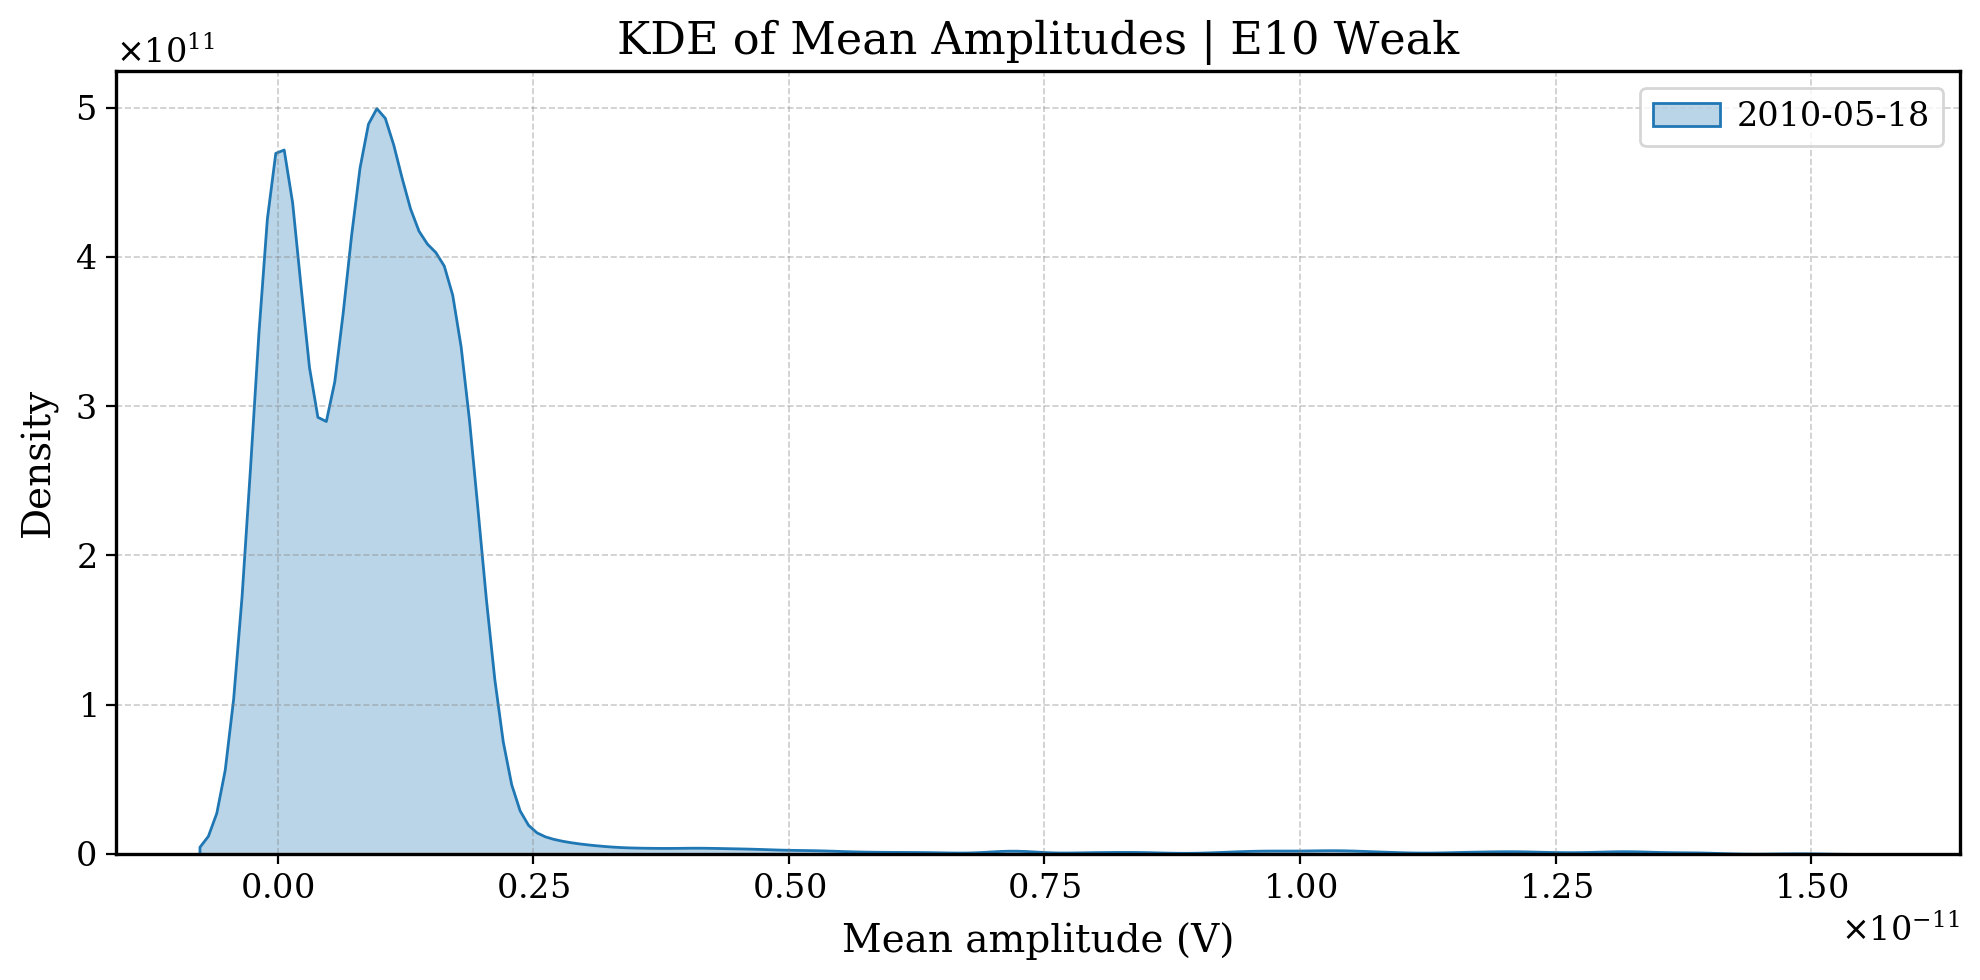

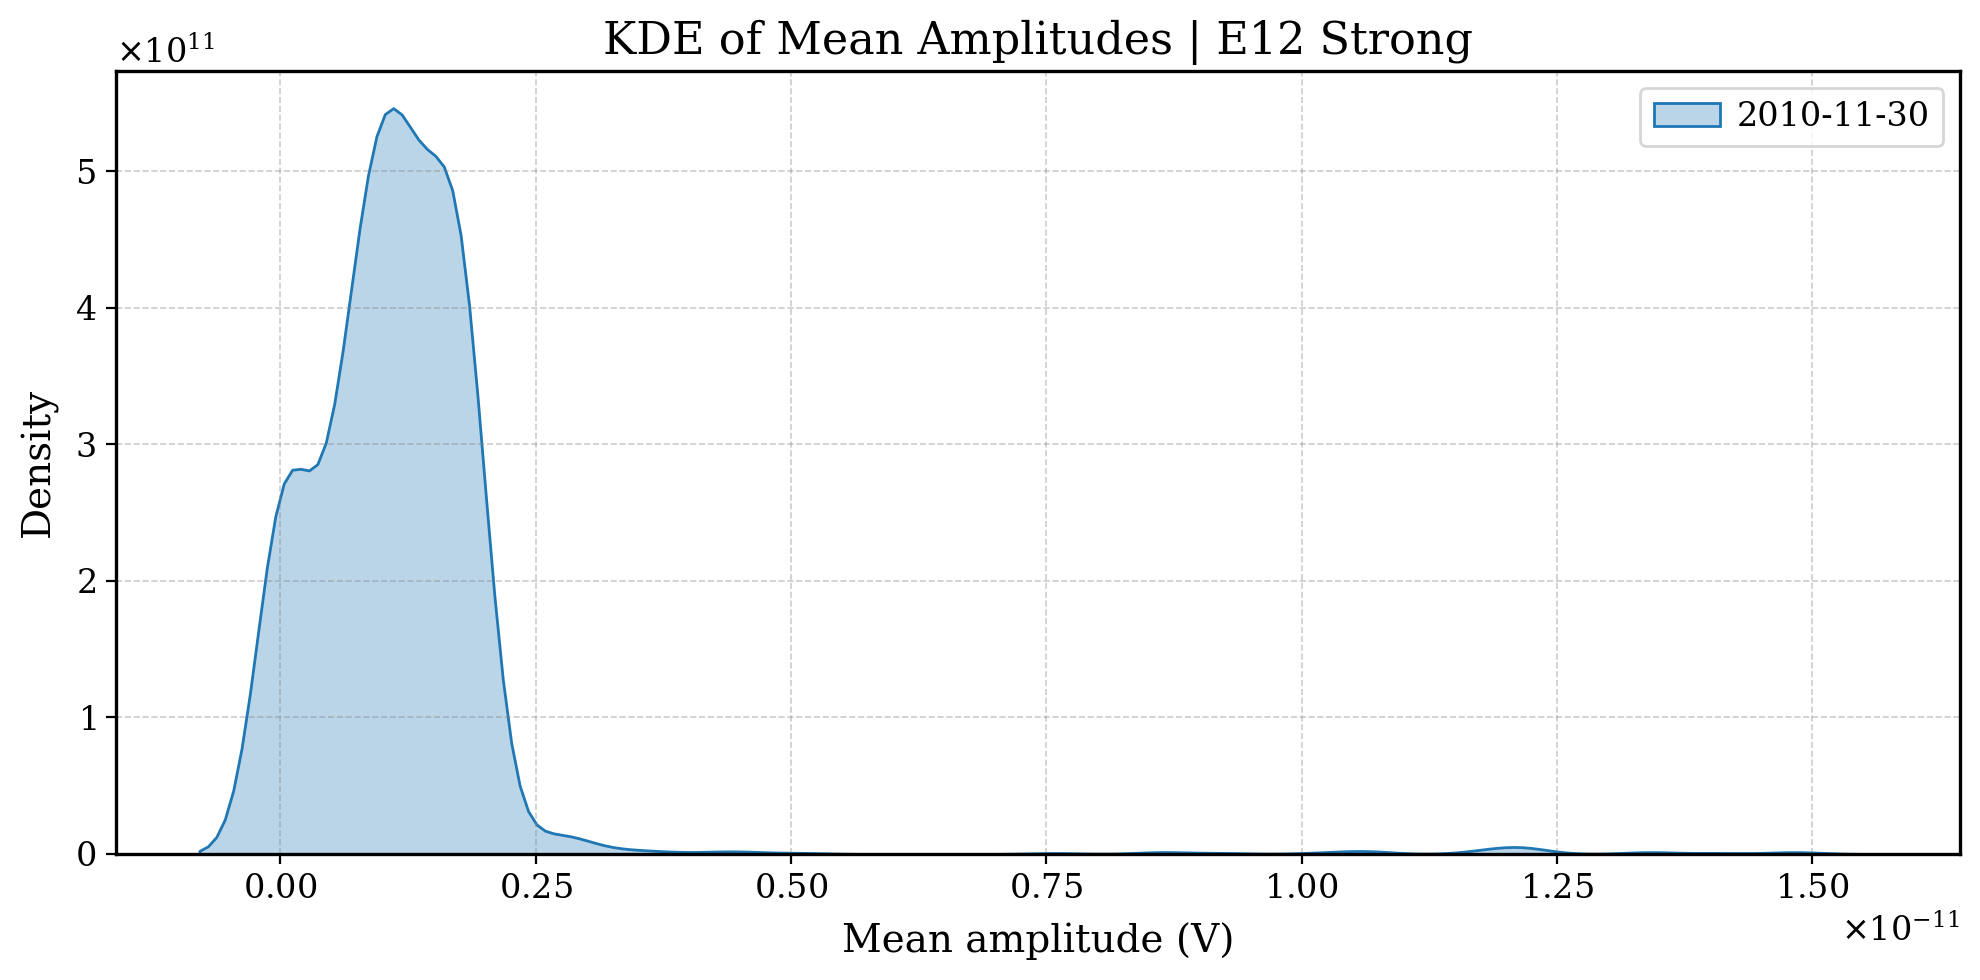

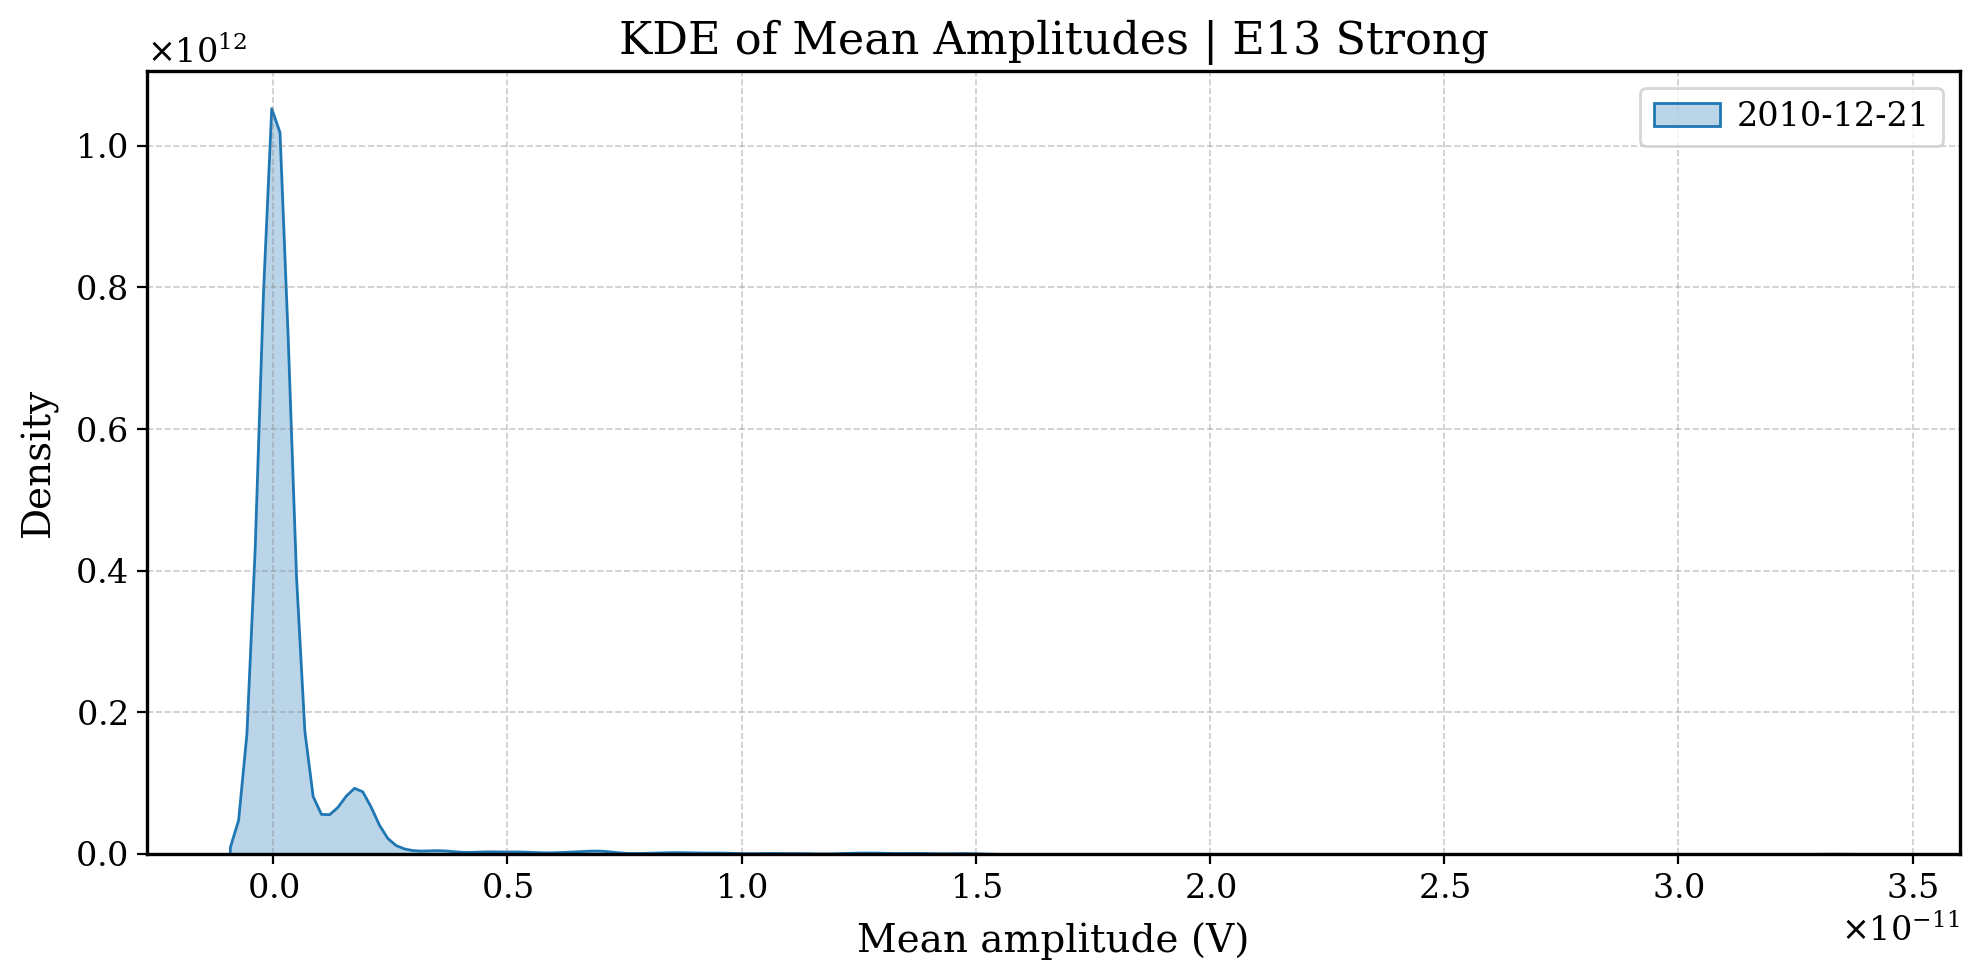

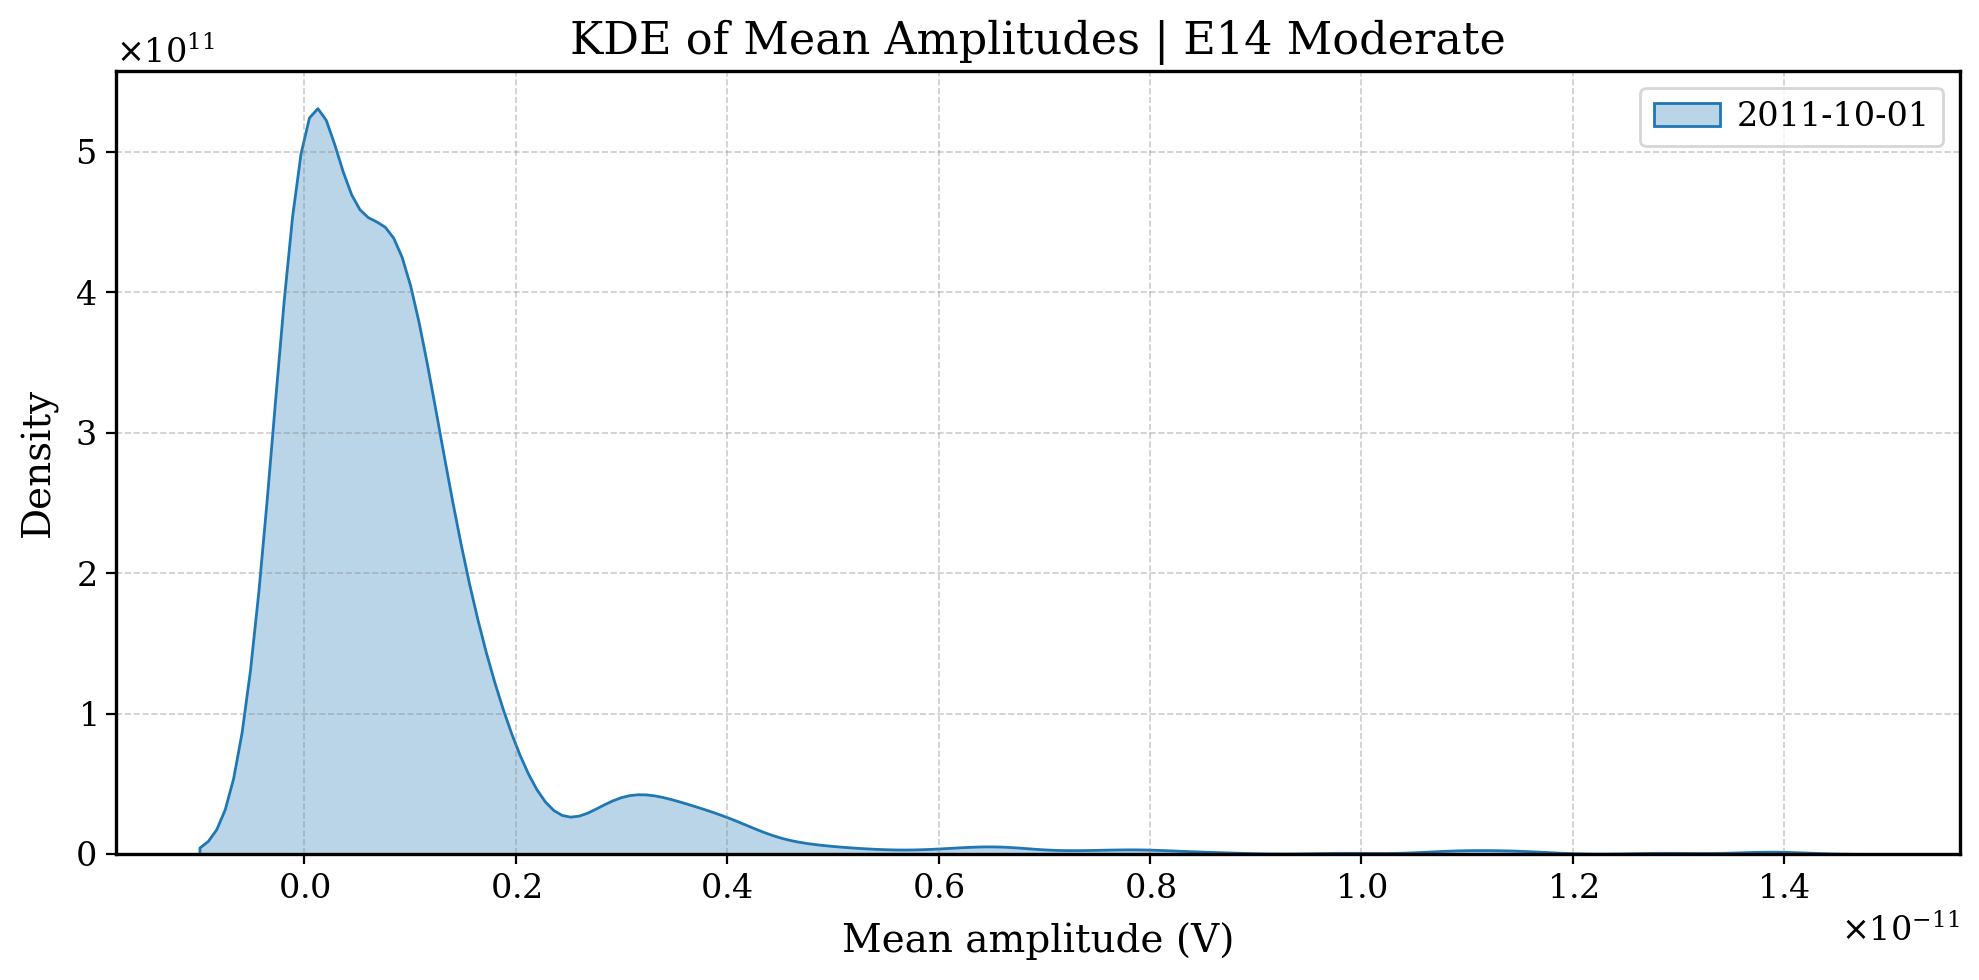

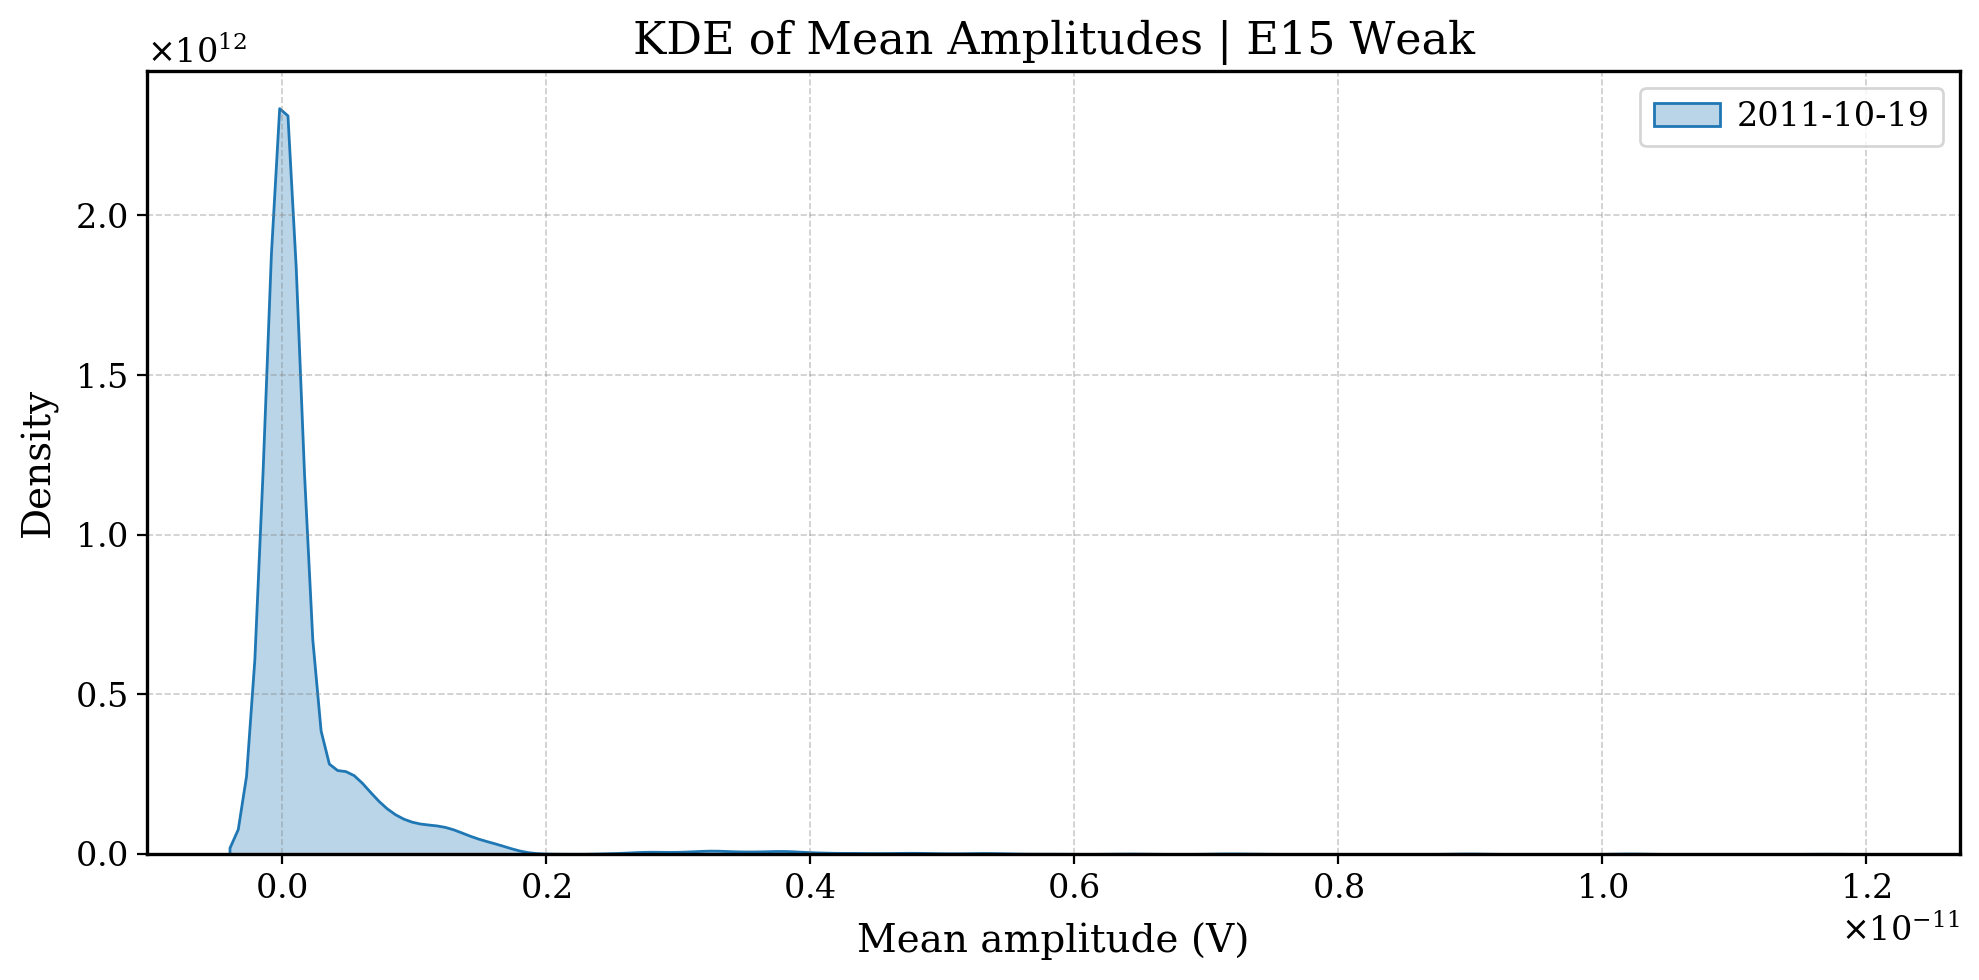

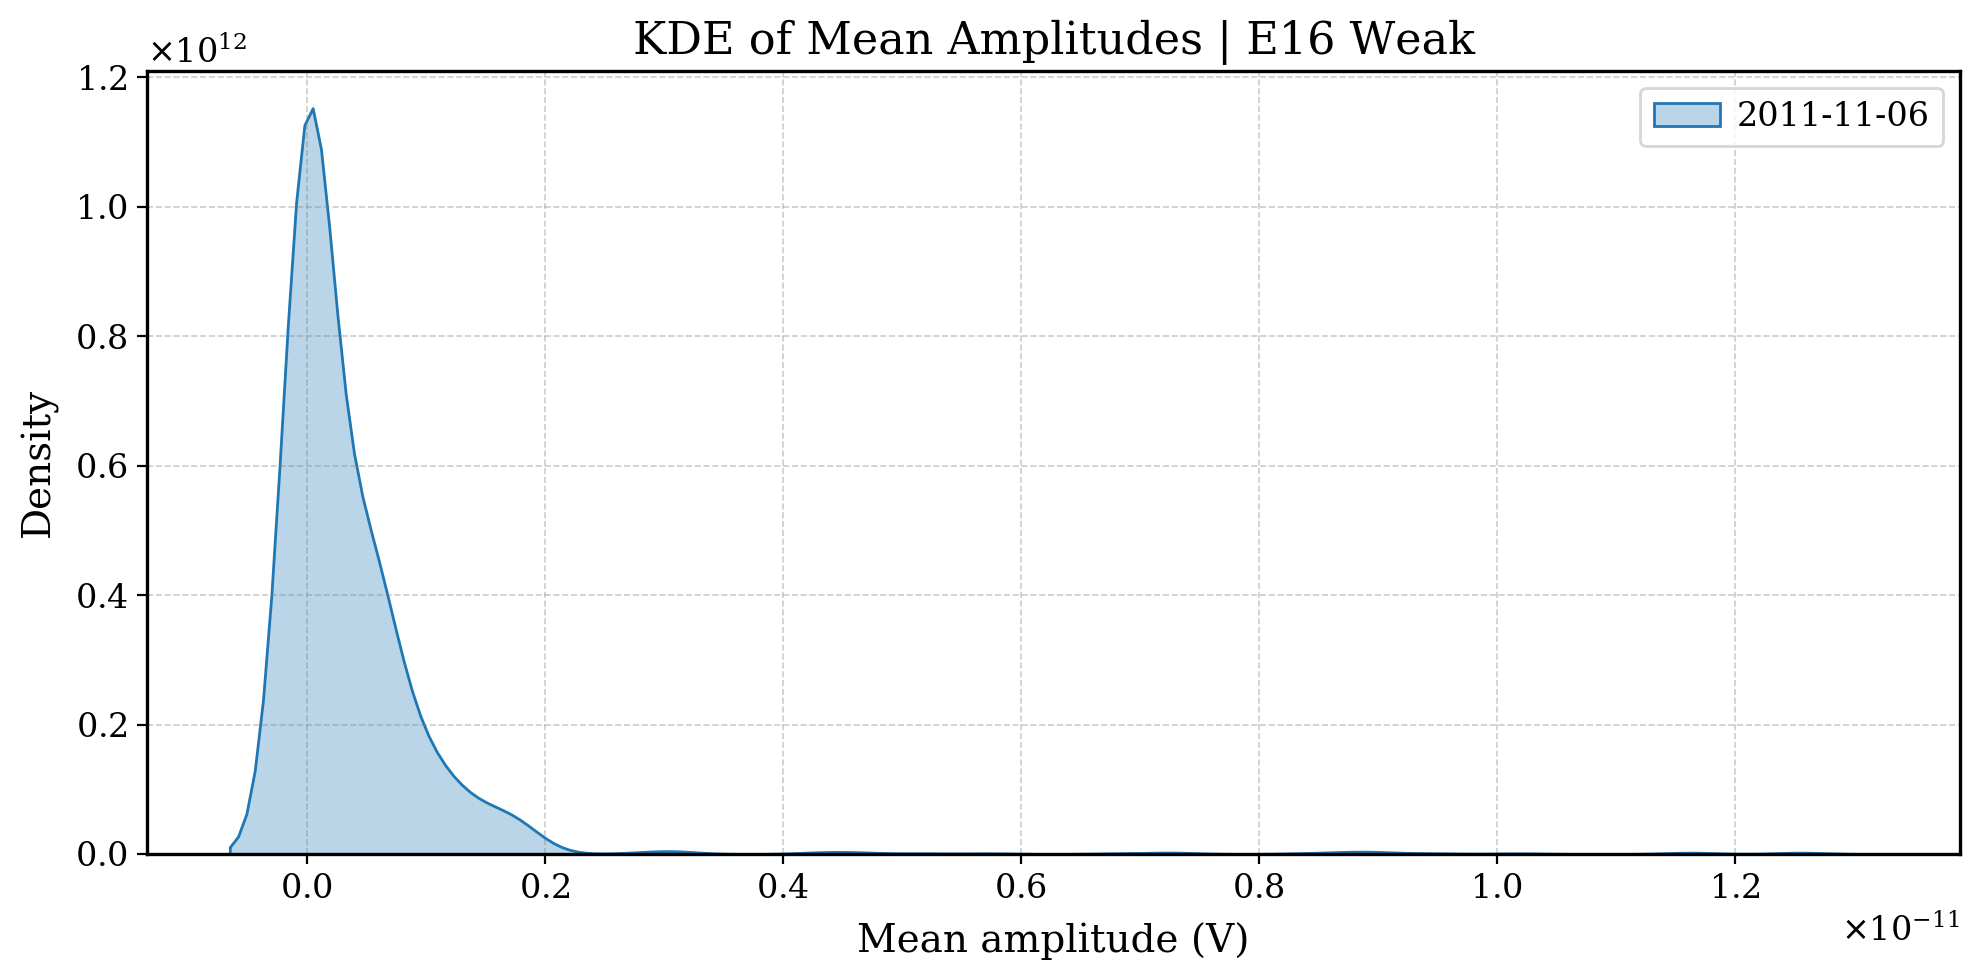

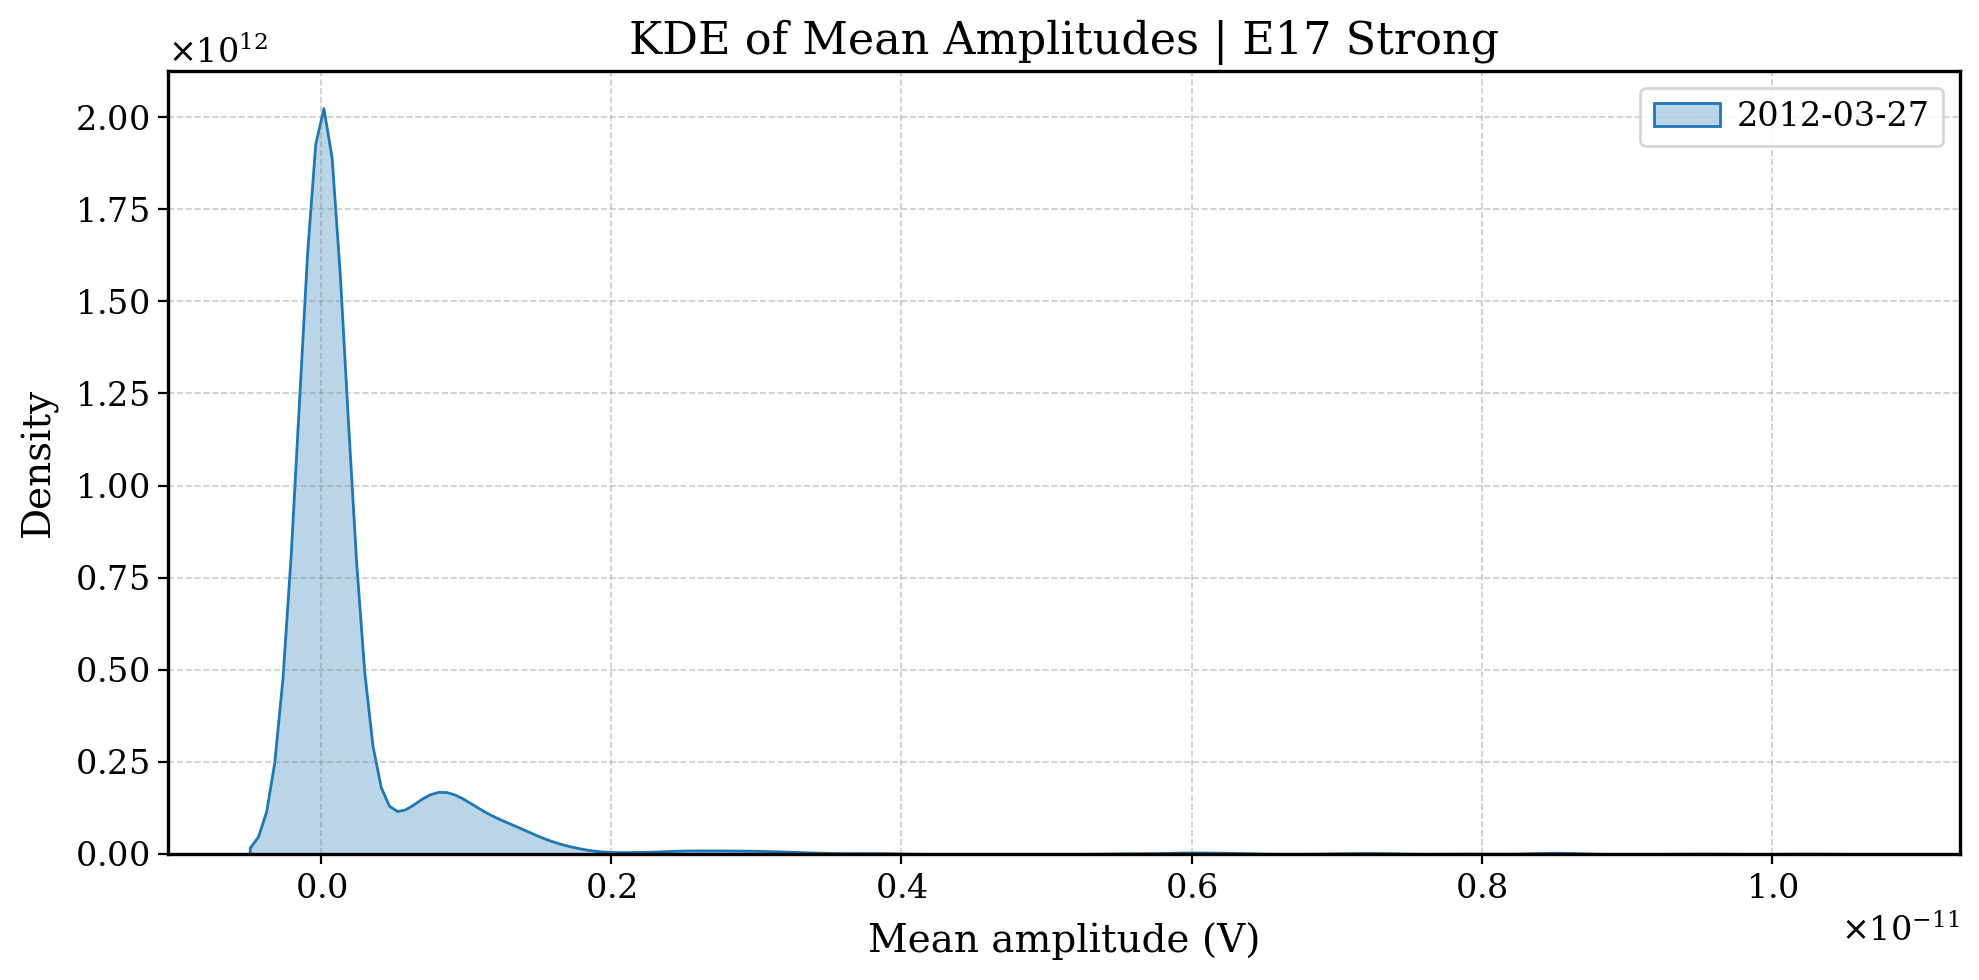

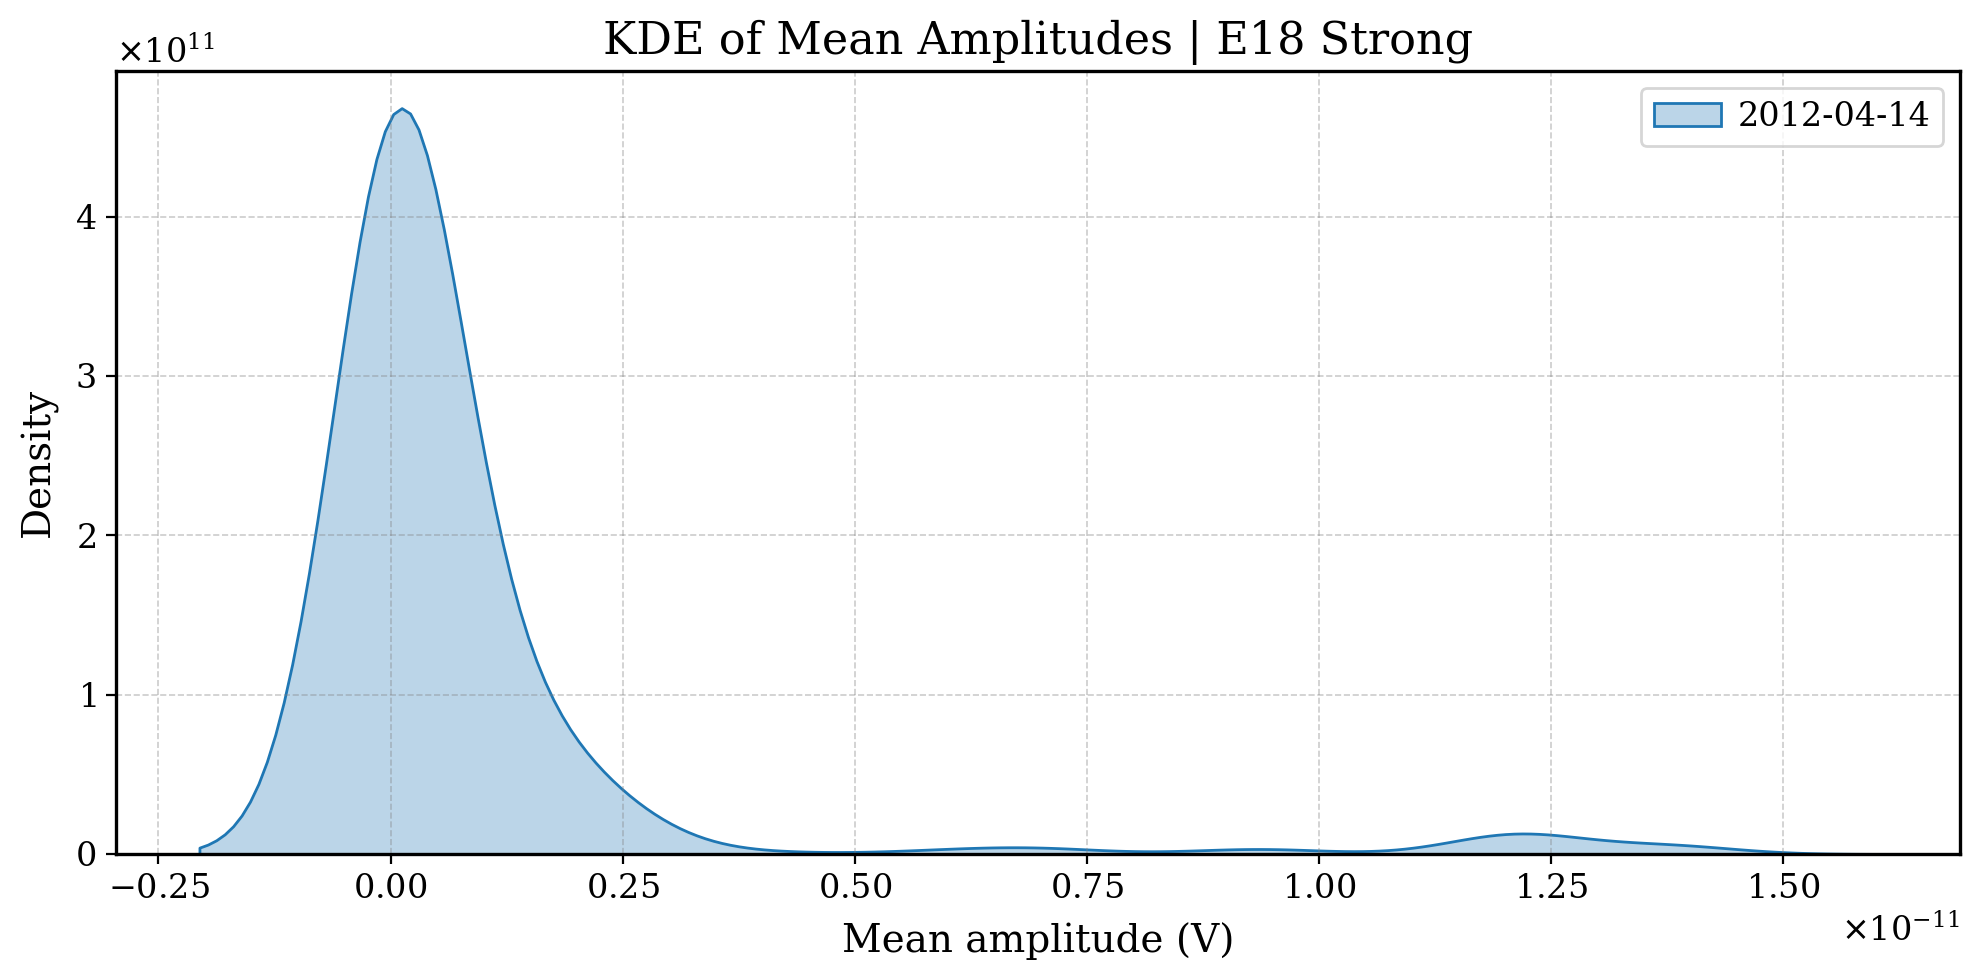

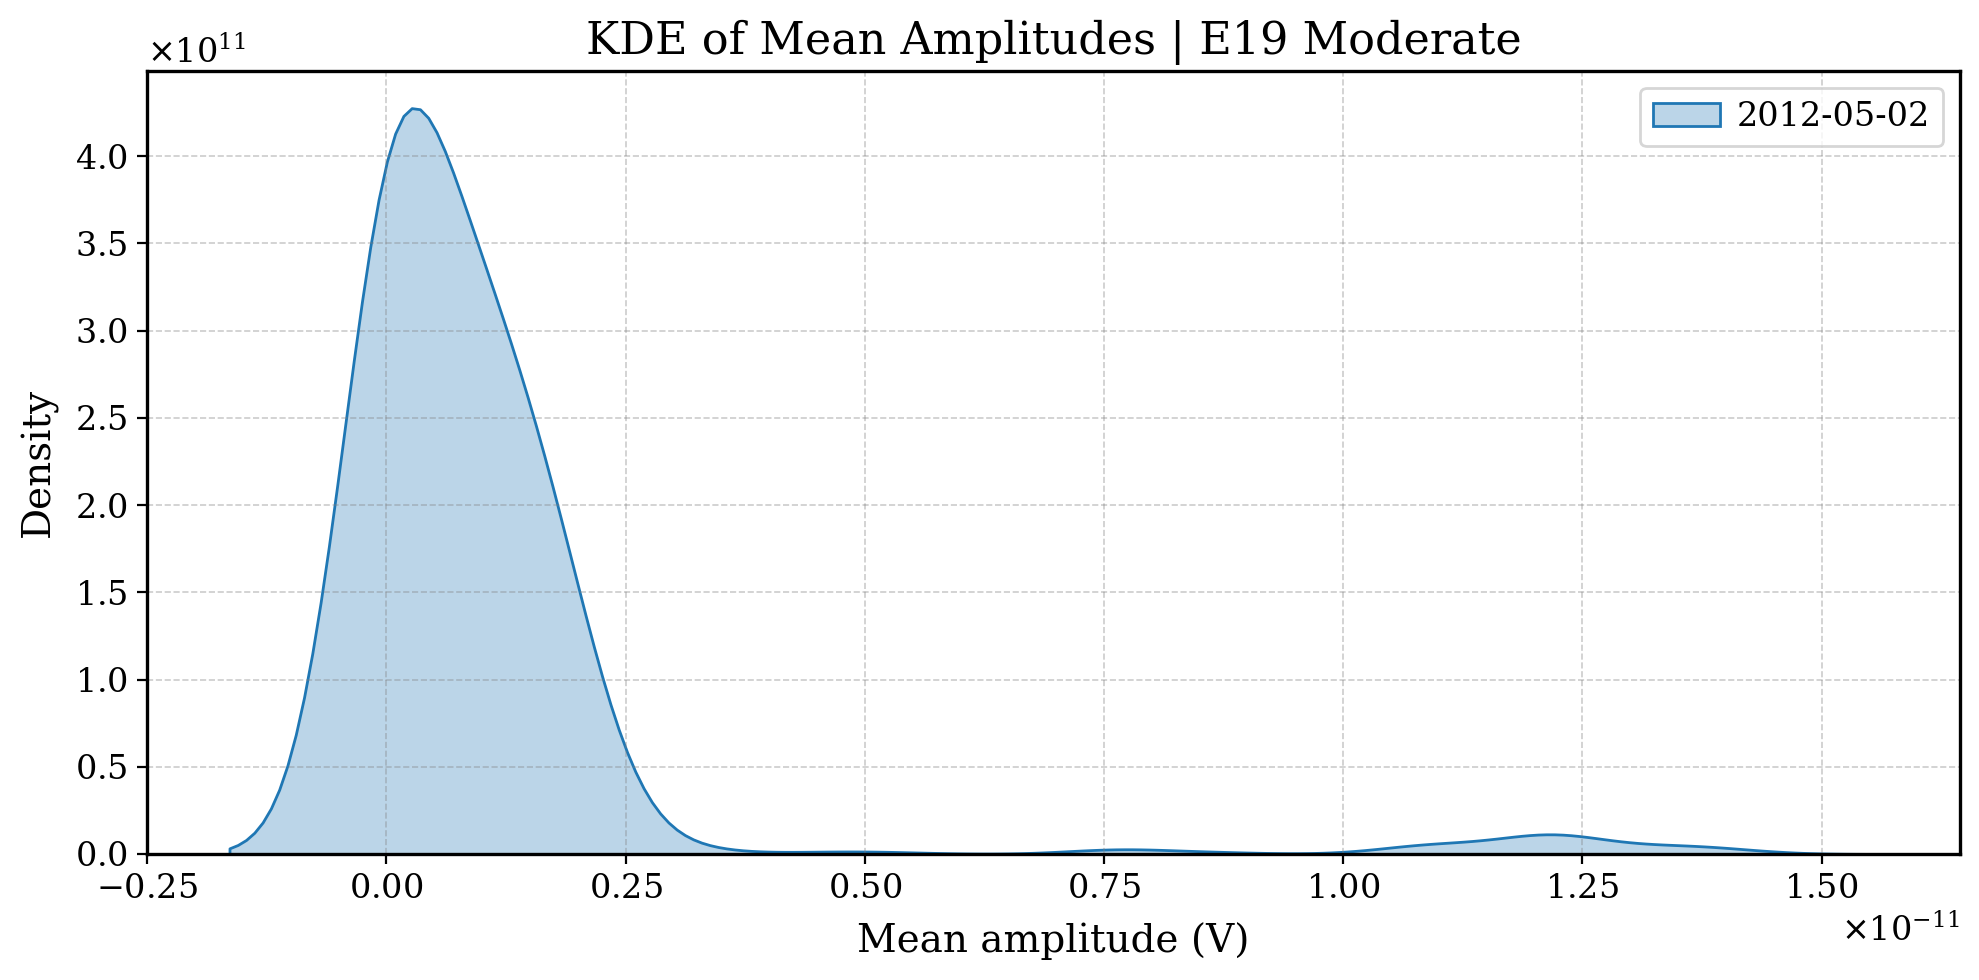

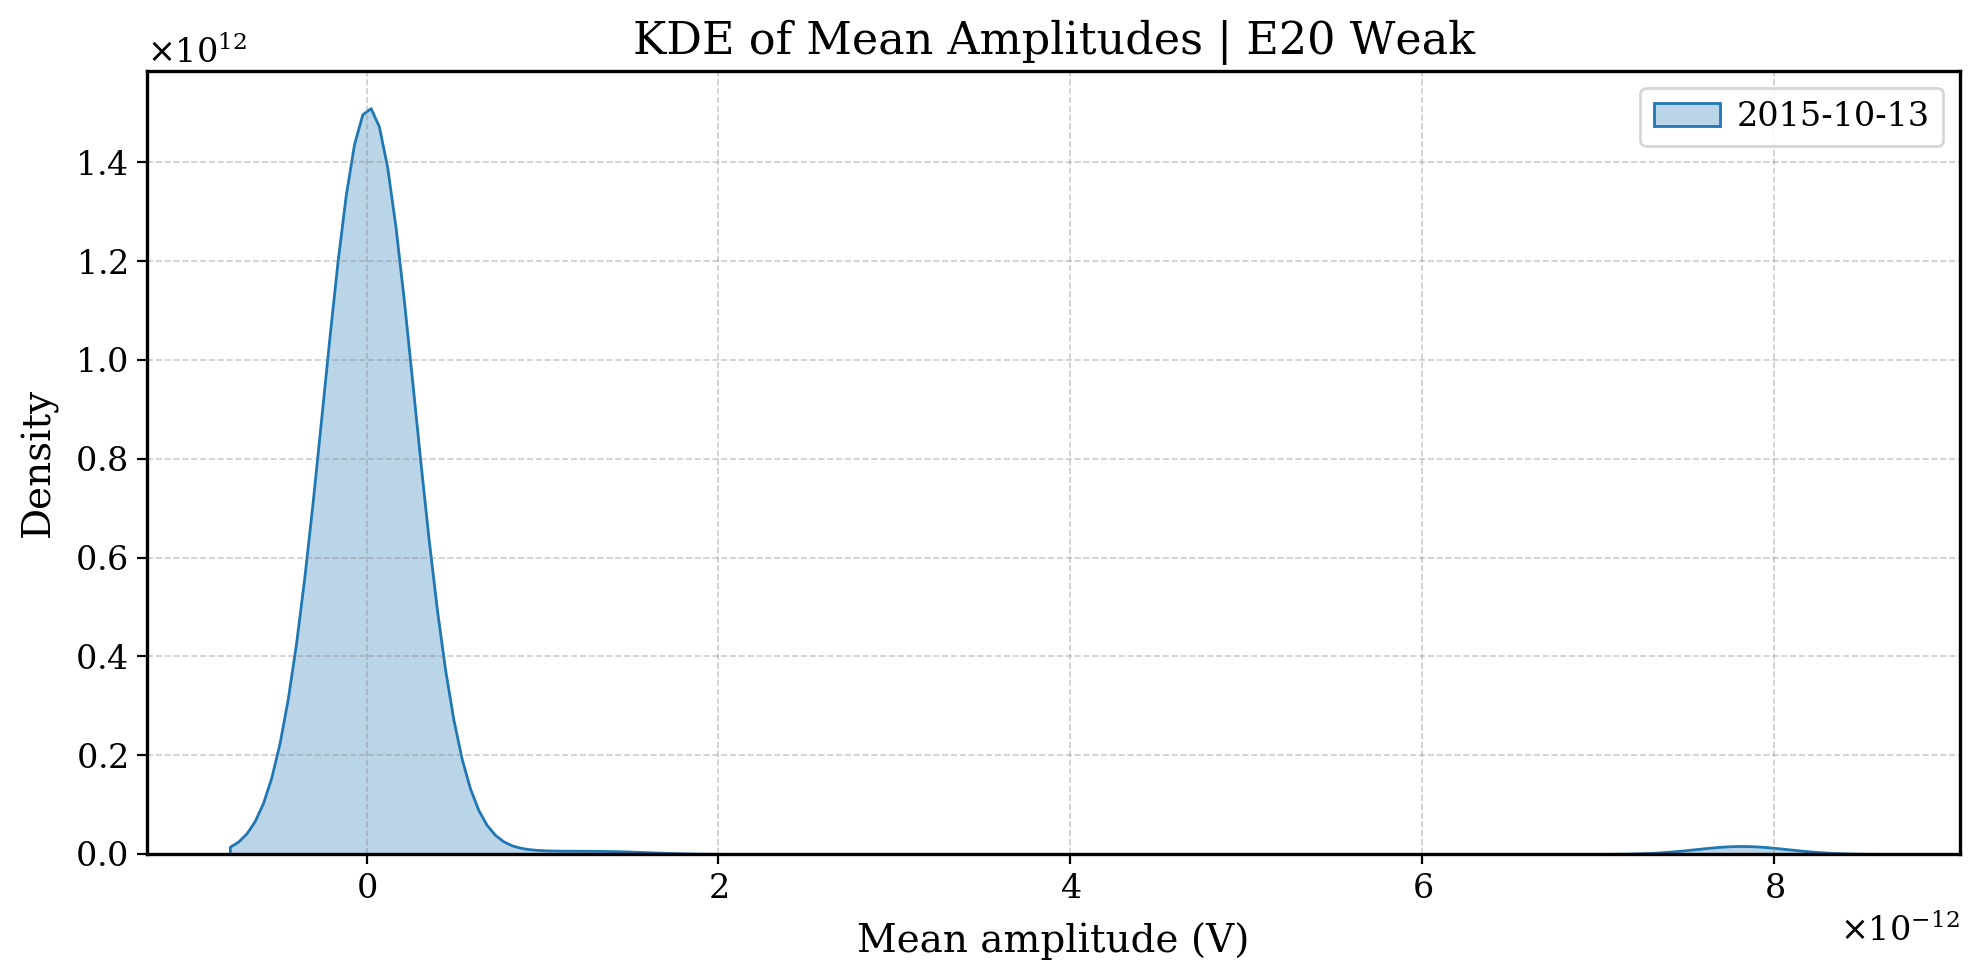

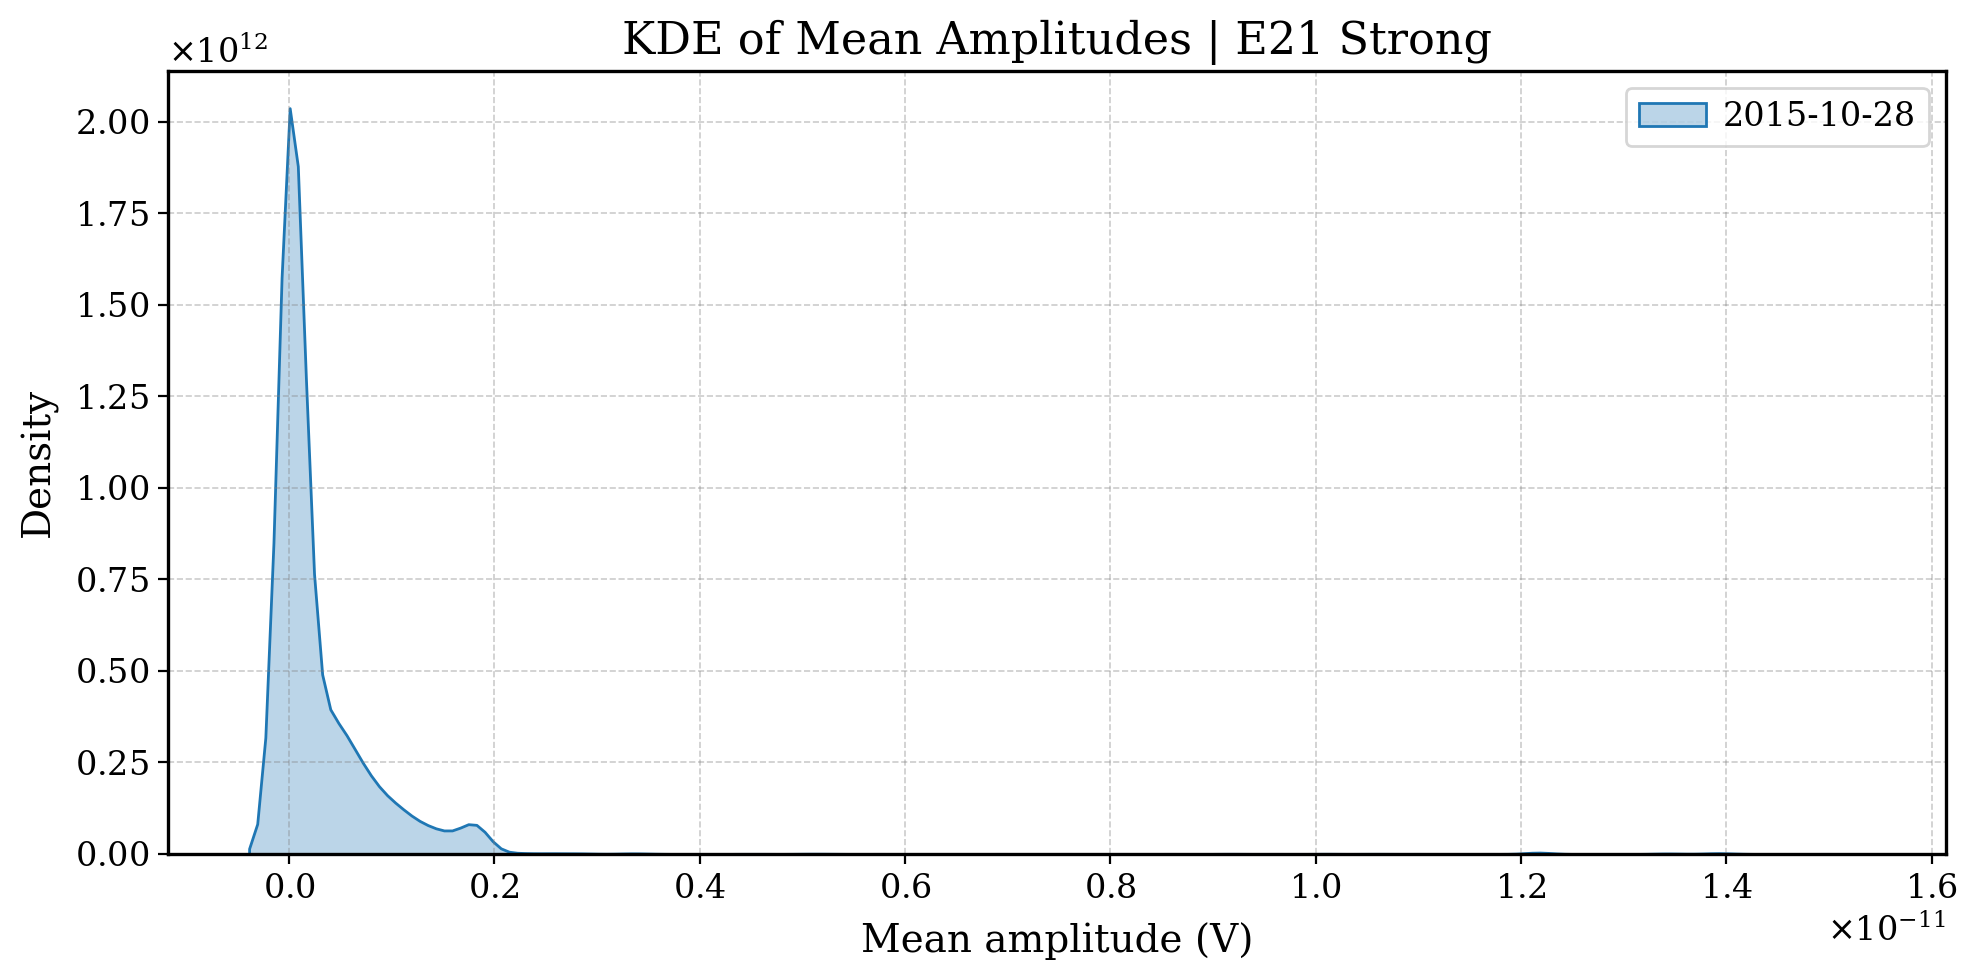

In [81]:
# flybys is a list of tuples (name, time_str, strength)
for name, time_str, strength in flybys:
    center = pd.to_datetime(time_str)
    # set window to cover exactly 3 calendar days: the flyby day +/- 1 day, all floor-ed to midnight
    start = (center - timedelta(hours=6)).floor("D")
    end = (center + timedelta(hours=12)).floor("D")  # three whole days: day_before, flyby_day, day_after

    # Restrict data for the 3-day window
    period_df = df[(df["TIME"] >= start) & (df["TIME"] < end)].copy()  # you already did this!
    
    if period_df.empty:
        print(f"[INFO] No data found for {name} ({strength}) near {center.date()}")
        continue
    
    # Mean amplitude from all four channels
    period_df["MEAN_AMPLITUDE"] = period_df[["QP_AMPLITUDE", "QI_AMPLITUDE", "QT_AMPLITUDE", "QC_AMPLITUDE"]].mean(axis=1)
    
    # Plot KDE for each individual day in window
    period_df["DAY"] = period_df["TIME"].dt.floor('D')
    days_in_window = sorted(period_df["DAY"].unique())
    plt.figure(figsize=(10,5))
    for d in days_in_window:
        sns.kdeplot(
            period_df.loc[period_df["DAY"] == d, "MEAN_AMPLITUDE"].dropna(),
            label=str(d.date()), fill=True, alpha=0.3
        )
    plt.title(f"KDE of Mean Amplitudes | {name} {strength}")
    plt.xlabel("Mean amplitude (V)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()